In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from scipy.integrate import solve_ivp

In [2]:

# Labels do eixo horizontal considerando o período de início de fim da coleta de dados.
lista = []
for ano in range(2020,2023,1):
    for mes in range(1,13,1):
        if mes < 10:
            lista.append(f'{ano}/0{mes}/01')
        else:
            lista.append(f'{ano}/{mes}/01')
labels_lista = lista[3:28]

# Fonte dos dados: 
<http://sistemas.saude.rj.gov.br/tabnetbd/dhx.exe?covid19/esus_sivep.def>

<https://globaldatalab.org/shdi/shdi/?levels=1%2B4&interpolation=1&extrapolation=0&nearest_real=0> 

<https://github.com/CSSEGISandData/COVID-19>

<https://egov.santos.sp.gov.br/santosmapeada/Saude/DadosDEVIG/MapaDEVIG/#divPesquisasCONF>

# Niterói (Brasil) - IDH(2010): 0.837

In [ ]:
dados0 = pd.read_csv('/home/isplay/Downloads/esus_sivep16509112622.csv', index_col=0)
dados1 = dados0.drop('Total')
dados1

In [ ]:
dados0 = pd.read_csv('/home/isplay/Downloads/esus_sivep16509112622.csv', index_col=0)
dados0 = dados0.drop('Total')

população_niteroi = 515317

dados0_y_niteroi = dados0['Niteroi'].to_numpy()/população_niteroi
dados0_x_niteroi = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_niteroi, dados0_y_niteroi)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Niterói')
#plt.savefig('niteroi.png')

# Buenos Aires - Argentina - 0,867

In [1]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/buenos_aires_casos.csv', index_col=1)

população_ba = 2891082

dados0_y_ba = dados0['Casos confirmados'].to_numpy()/população_ba
dados0_x_ba = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_ba, dados0_y_ba)
ax.grid(True)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Buenos Aires')
ax.set_xticks(labels_lista)

NameError: name 'pd' is not defined

# Região Metropolitana de Santiago - Chile

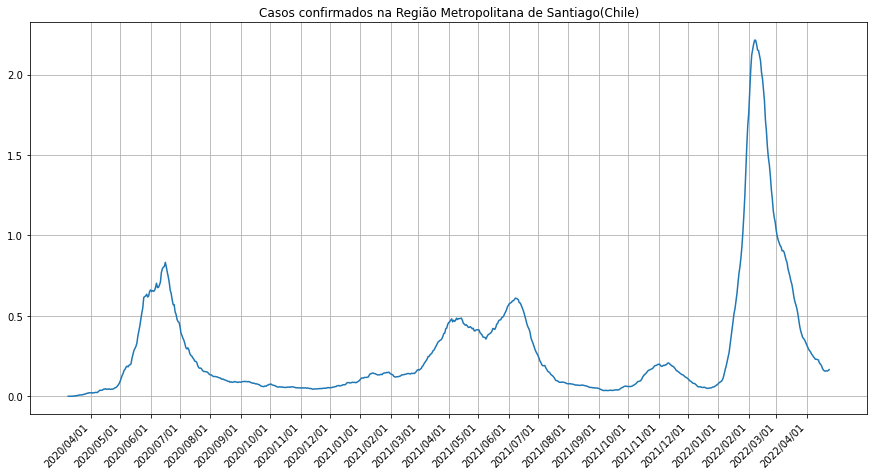

In [266]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/Região Metropolitana de Santiago(Chile).csv', index_col=0)
dados0 = dados0.rename(columns={'Região Metropolitana de Santiago; IDH(2019):0.883':'Região Metropolitana de Santiago'})

dados0 = dados0.drop(['2020/03/03','2020/03/04','2020/03/05','2020/03/06','2020/03/07','2020/03/08'])

população_rms = 7003122

dados0_y_rms = dados0['Região Metropolitana de Santiago'].to_numpy()*100000/população_rms
dados0_x_rms = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rms, dados0_y_rms)
ax.grid(True)
fig.autofmt_xdate(rotation=45)
plt.title('Casos confirmados na Região Metropolitana de Santiago(Chile)')
ax.set_xticks(labels_lista)

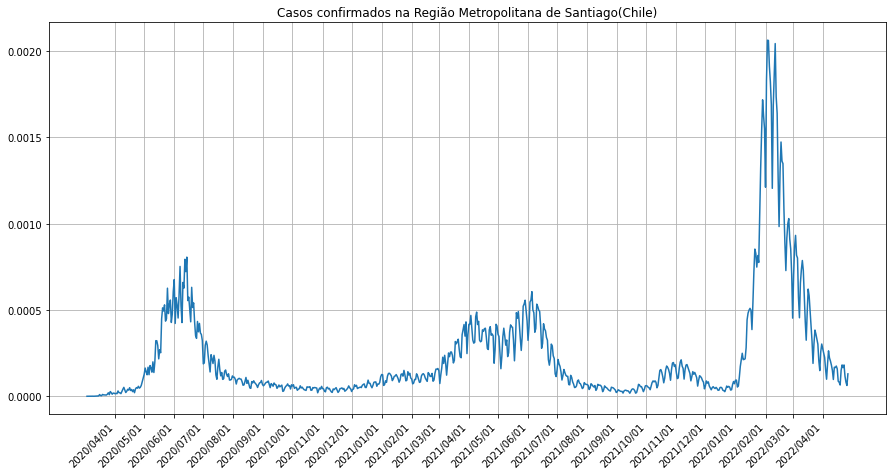

In [277]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/Metropolitana.csv', index_col=0)

população_rms = 7003122

dados0_y_rms = dados0['Metropolitana'].to_numpy()/população_rms
dados0_x_rms = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rms, dados0_y_rms)
ax.grid(True)
fig.autofmt_xdate(rotation=45)
plt.title('Casos confirmados na Região Metropolitana de Santiago(Chile)')
ax.set_xticks(labels_lista)

# JAKSON COUNTY

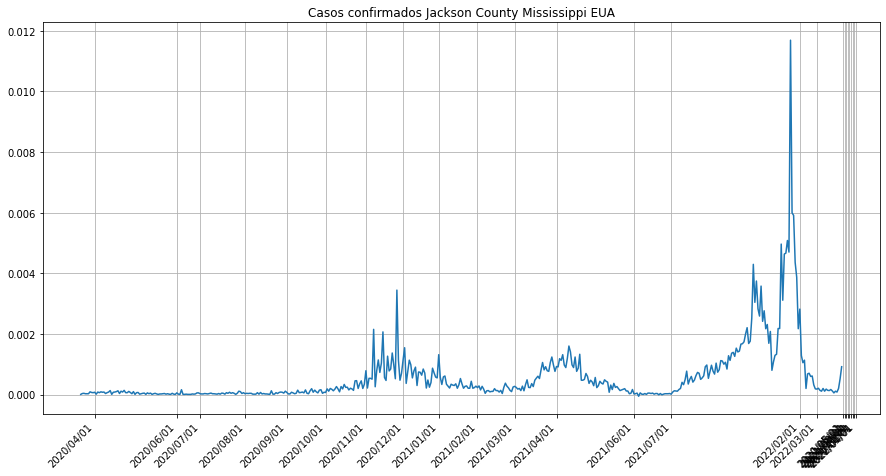

In [261]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/Jackson MI casos.csv', index_col=1)

população_jk = 143617

dados0_y_jk = dados0['Casos Jackson MI'].to_numpy()/população_jk
dados0_x_jk = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_jk, dados0_y_jk)
ax.grid(True)
fig.autofmt_xdate(rotation=45)
plt.title('Casos confirmados Jackson County Mississippi EUA')
ax.set_xticks(labels_lista)

In [262]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/Jackson County casos confirmados Mississippi.csv', index_col=1)
dados1 = dados0['Jackson County casos confirmados']
dados1

Datas
2020/01/22      0
2020/01/23      0
2020/01/24      0
2020/01/25      0
2020/01/26      0
             ... 
2022/04/19    132
2022/04/20      0
2022/04/21      0
2022/04/22      0
2022/04/23      0
Name: Jackson County casos confirmados, Length: 823, dtype: int64

In [263]:
# Remover zeros
index = dados1.index
lista_x = []
lista_y = []

dados3 = dados1.T
for i in range(dados3.size):
    if dados1[i] != 0:
        lista_x.append(index[i])    
        lista_y.append(dados1[i])
data = pd.DataFrame({'Data':lista_x,'Casos Jackson MI':lista_y})
data

,Data,Casos Jackson MI
0,2020/03/16,1
1,2020/03/23,5
2,2020/03/24,6
3,2020/03/25,4
4,2020/03/27,4
...,...,...
487,2022/03/29,16
488,2022/03/31,12
489,2022/04/05,29
490,2022/04/12,75


In [264]:
data.to_csv('Jackson MI casos.csv')

# Unindo os gráficos

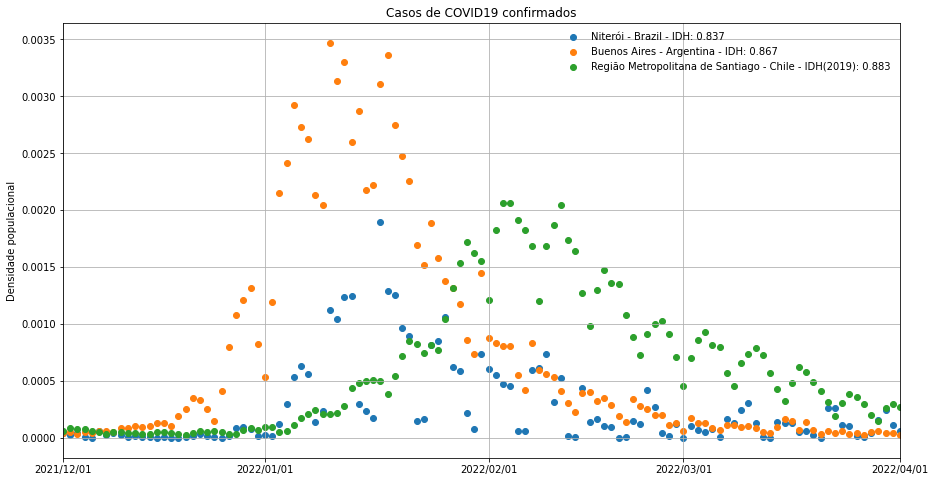

In [280]:
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(dados0_x_niteroi, dados0_y_niteroi, label='Niterói - Brazil - IDH: 0.837')
ax.scatter(dados0_x_ba, dados0_y_ba, label='Buenos Aires - Argentina - IDH: 0.867')
ax.scatter(dados0_x_rms, dados0_y_rms, label='Região Metropolitana de Santiago - Chile - IDH(2019): 0.883')
#ax.scatter(dados0_x_jk, dados0_y_jk, label='Jackson County - Mississippi(EUA)')


ax.set_ylabel('Densidade populacional')
ax.grid(True)
ax.legend(frameon=False)
#fig.autofmt_xdate(rotation=45)
plt.title('Casos de COVID19 confirmados')
ax.set_xticks(labels_lista)
ax.set_xlim(['2021/12/01','2022/04/01'])
plt.savefig('Casos de COVID19 confirmados.pdf')

# Reunion (France) – IDH(2019): 0.843

Text(0.5, 1.0, 'Infectados na cidade Reunion')

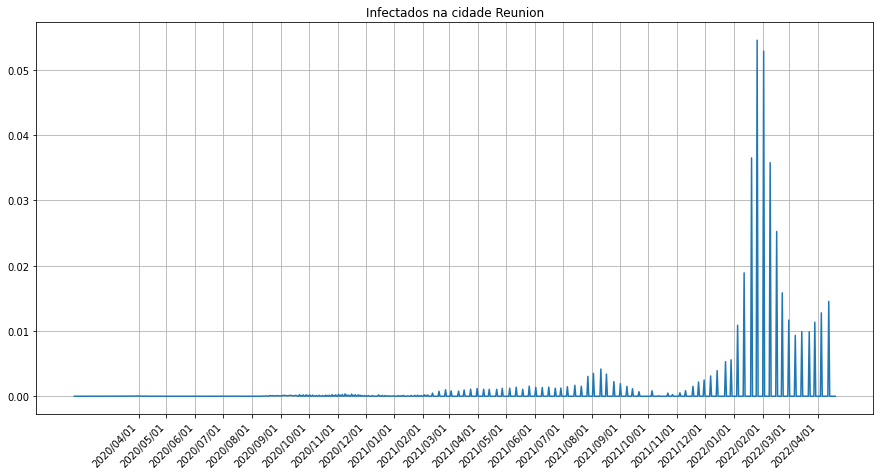

In [127]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Reunion = 859959

dados0_y_Reunion = dados0['Reunion – France – IDH = 0.843'].to_numpy()/população_Reunion
dados0_x_Reunion = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Reunion, dados0_y_Reunion)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Reunion')

# Tanguá (Brasil) - IDH(2010): 0.654

Text(0.5, 1.0, 'Infectados na cidade Tanguá.')

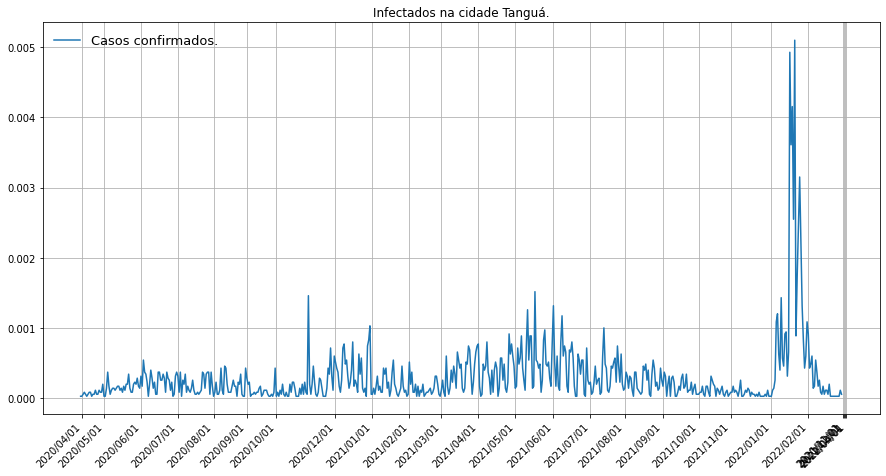

In [4]:
url = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Infectados_em_Tangu%C3%A1.csv'
dados0 = pd.read_csv(url, index_col=0)

população_tangua = 34898

dados0_y_tangua = dados0['Tanguá'].to_numpy()/população_tangua
dados0_x_tangua = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_tangua, dados0_y_tangua, label='Casos confirmados.')
ax.grid(True)
ax.legend(frameon=False, fontsize=13)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Tanguá.')
#plt.savefig('tangua.png')
#ax.set_ylim([0,40000])

# Rio de Janeiro(cidade, Brasil) - IDH(2010): 0.799

Text(0.5, 1.0, 'Infectados na cidade Rio de Janeiro.')

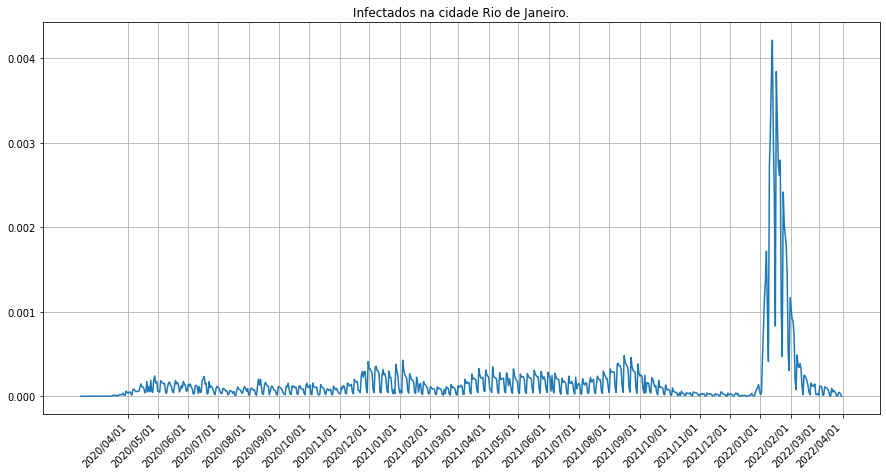

In [5]:
url = 'https://raw.githubusercontent.com/isplay/projeto_propagacao_epidemias/main/csv/Infectados_em_Rio_de_Janeiro(cidade).csv'
dados0 = pd.read_csv(url, index_col=0)

população_rio = 6775561

dados0_y_rj = dados0['Rio de Janeiro'].to_numpy()/população_rio
dados0_x_rj = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_rj, dados0_y_rj)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Rio de Janeiro.')
#ax.set_ylim([0,40000])
#plt.savefig('Rio.png')

# Tainjin (China) - IDH(2019): 0.838

Text(0.5, 1.0, 'Infectados na cidade Tainjin')

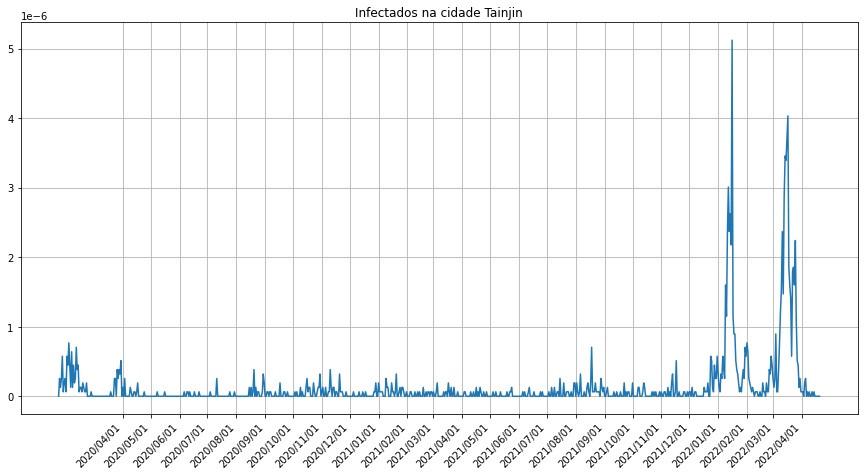

In [7]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_tainjin = 15621200

dados0_y_tainjin = dados0['Tainjin - China - IDH = 0.838'].to_numpy()/população_tainjin
dados0_x_tainjin = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_tainjin, dados0_y_tainjin)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Tainjin')

# Martinique (France) – IDH(2019): 0.848

Text(0.5, 1.0, 'Infectados na cidade Martinique')

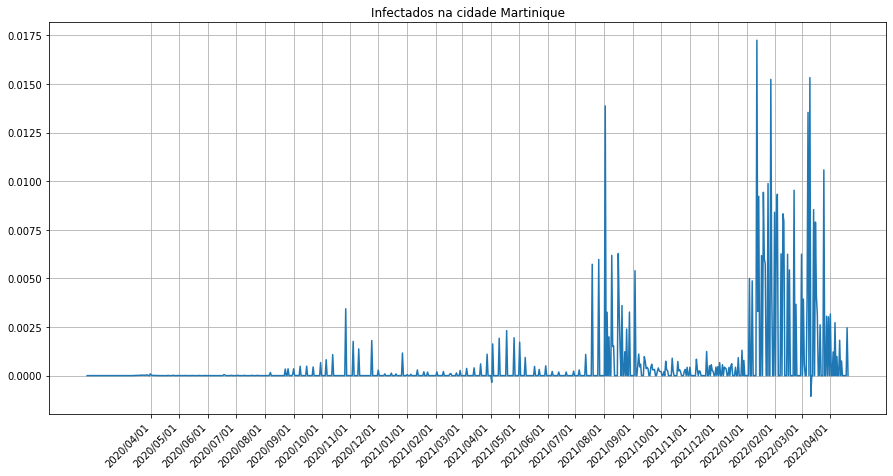

In [9]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Martinique = 376480

dados0_y_Martinique = dados0['Martinique – France – IDH = 0.848'].to_numpy()/população_Martinique
dados0_x_Martinique = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Martinique, dados0_y_Martinique)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Martinique')

# Guadeloupe(France) – IDH(2019) = 0.853

Text(0.5, 1.0, 'Infectados na cidade Guadeloupe')

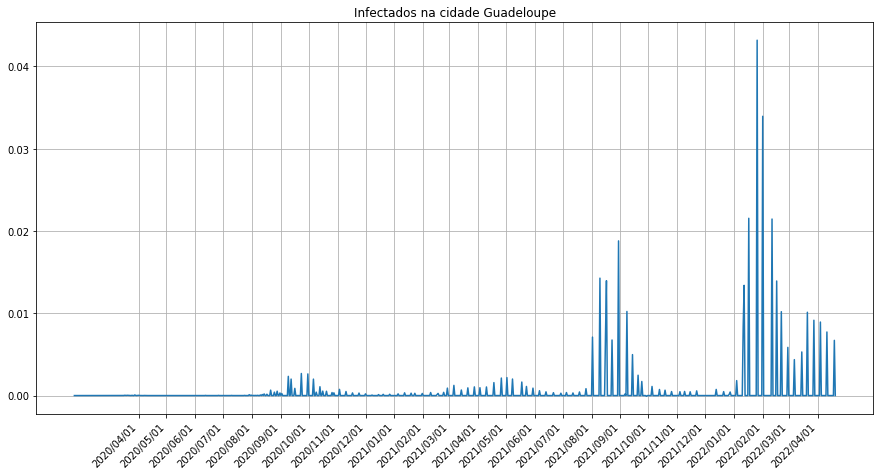

In [10]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Guadeloupe = 395700

dados0_y_Guadeloupe = dados0['Guadeloupe – France – IDH = 0.853'].to_numpy()/população_Guadeloupe
dados0_x_Guadeloupe = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Guadeloupe, dados0_y_Guadeloupe)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados na cidade Guadeloupe')

# Beijing(China); IDH(2010): 0.838

Text(0.5, 1.0, 'Infectados Beijing(China)')

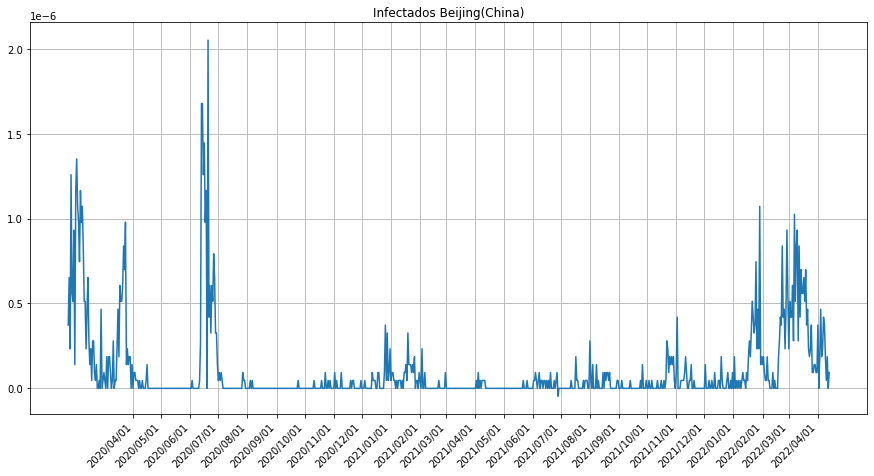

In [11]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_beijing = 21450000

dados0_y_Beijing = dados0['Beijing(China); IDH(2010): 0.838'].to_numpy()/população_beijing
dados0_x_Beijing = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Beijing, dados0_y_Beijing)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Beijing(China)')

# Saskatchewan(Canadá); IDH(2010): 0.891

Text(0.5, 1.0, 'Infectados Saskatchewan(Canadá)')

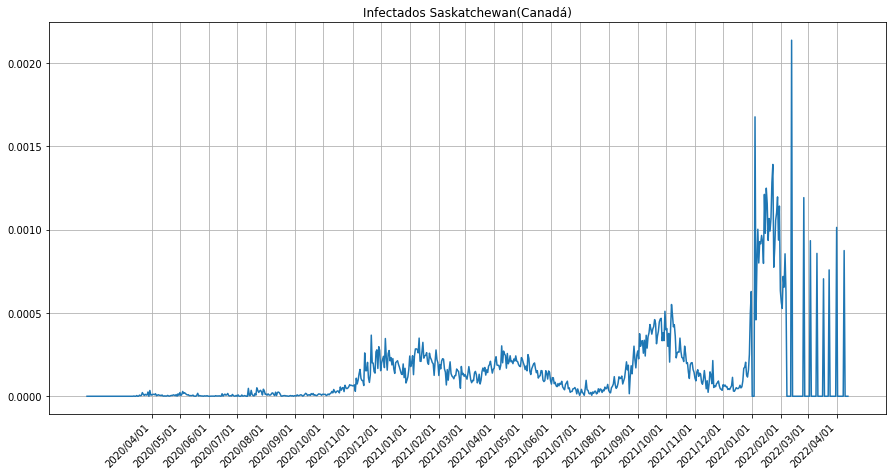

In [12]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Saskatchewan = 1180867

dados0_y_Saskatchewan = dados0['Saskatchewan(Canadá); IDH(2010): 0.891'].to_numpy()/população_Saskatchewan
dados0_x_Saskatchewan= dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Saskatchewan, dados0_y_Saskatchewan)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Saskatchewan(Canadá)')

# Quebec(Canadá); IDH(2010): 0.886

Text(0.5, 1.0, 'Infectados Quebec(Canadá)')

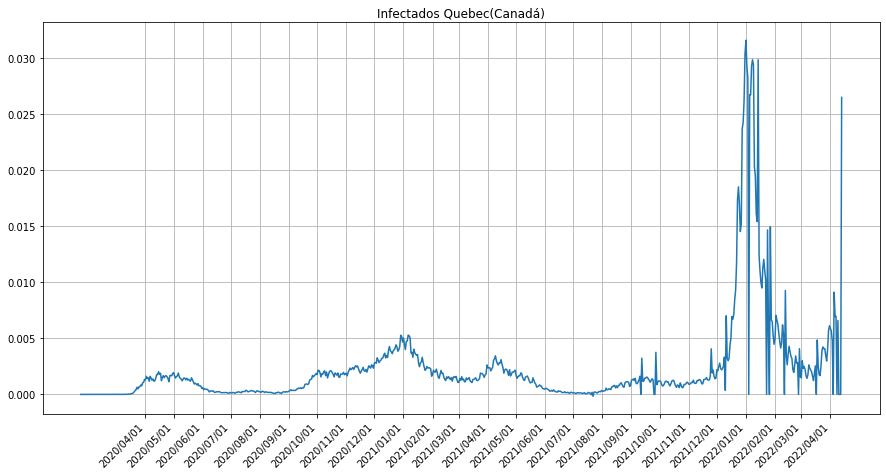

In [13]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Quebec = 542298

dados0_y_Quebec = dados0['Quebec(Canadá); IDH(2010): 0.886'].to_numpy()/população_Quebec
dados0_x_Quebec= dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Quebec, dados0_y_Quebec)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Quebec(Canadá)')

# Nova Scotia(Canadá); IDH(2010): 0.878

Text(0.5, 1.0, 'Infectados Nova Scotia(Canadá)')

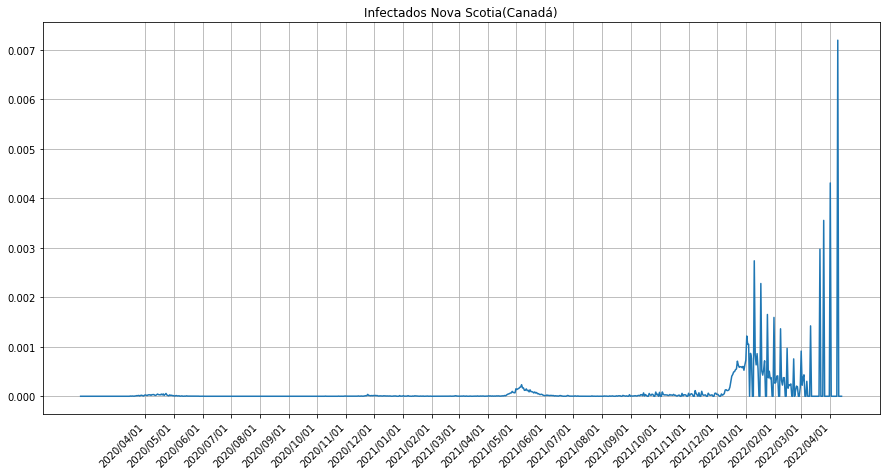

In [14]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Nova_Scotia = 971395

dados0_y_Nova_Scotia = dados0['Nova Scotia(Canadá); IDH(2010): 0.878'].to_numpy()/população_Nova_Scotia
dados0_x_Nova_Scotia = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Nova_Scotia, dados0_y_Nova_Scotia)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Nova Scotia(Canadá)')

# Newfoundland and Labrador(Canadá); IDH(2010): 0.874

Text(0.5, 1.0, 'Infectados Nova Newfoundland and Labrador(Canadá)')

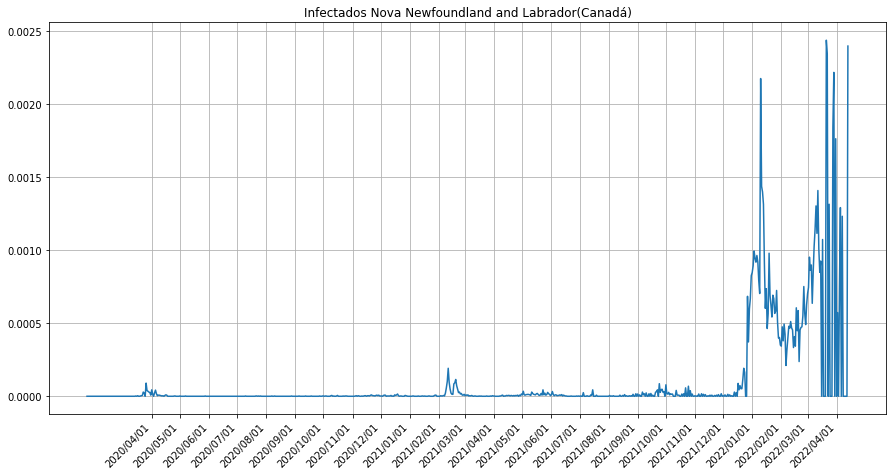

In [15]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Newfoundland_and_Labrador = 521542

dados0_y_Newfoundland_and_Labrador = dados0['Newfoundland and Labrador(Canadá); IDH(2010): 0.874'].to_numpy()/população_Newfoundland_and_Labrador
dados0_x_Newfoundland_and_Labrador = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Newfoundland_and_Labrador, dados0_y_Newfoundland_and_Labrador)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Nova Newfoundland and Labrador(Canadá)')

# New Brunswick(Canadá); IDH(2010): 0.873

Text(0.5, 1.0, 'Infectados New Brunswick(Canadá)')

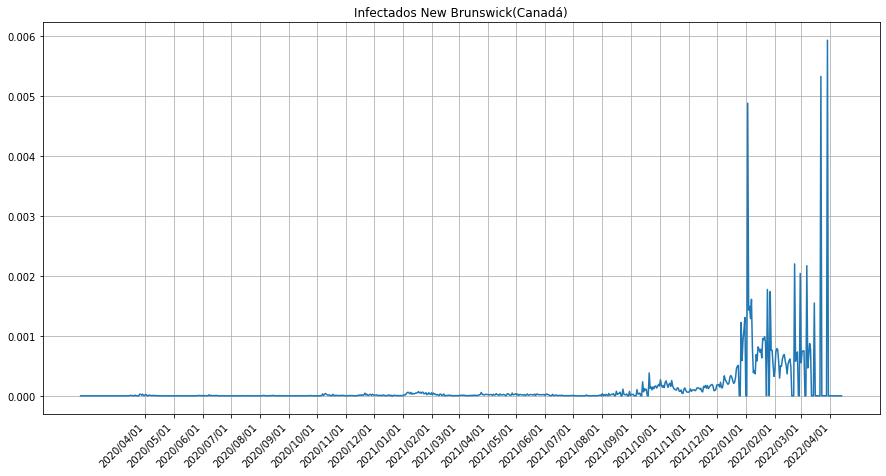

In [16]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_New_Brunswick = 521542

dados0_y_New_Brunswick = dados0['New Brunswick(Canadá); IDH(2010): 0.873'].to_numpy()/população_Newfoundland_and_Labrador
dados0_x_New_Brunswick = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_New_Brunswick, dados0_y_New_Brunswick)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados New Brunswick(Canadá)')

# Manitoba(Canadá); IDH(2010): 0.876

Text(0.5, 1.0, 'Infectados Manitoba(Canadá)')

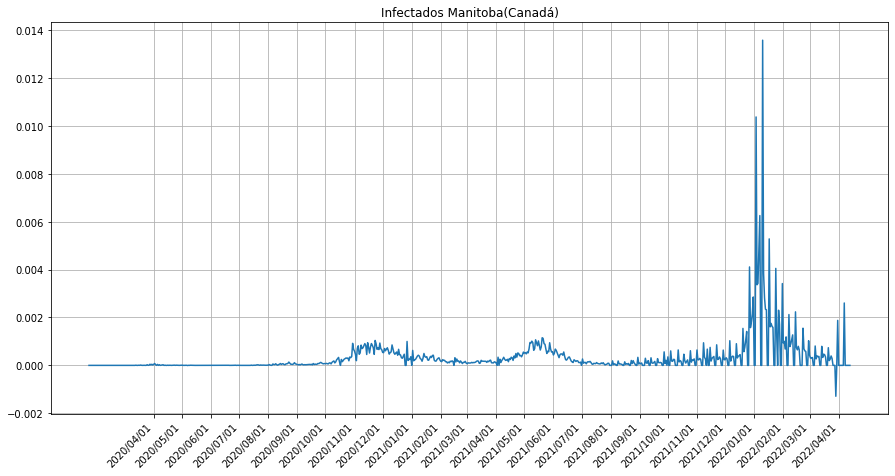

In [17]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/Cidades_IDH.csv', index_col=0)

população_Manitoba = 521542

dados0_y_Manitoba = dados0['Manitoba(Canadá); IDH(2010): 0.876'].to_numpy()/população_Manitoba
dados0_x_Manitoba = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Manitoba, dados0_y_Manitoba)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Manitoba(Canadá)')

# Brasília_df_0824

Text(0.5, 1.0, 'Infectados Brasília_df_0824')

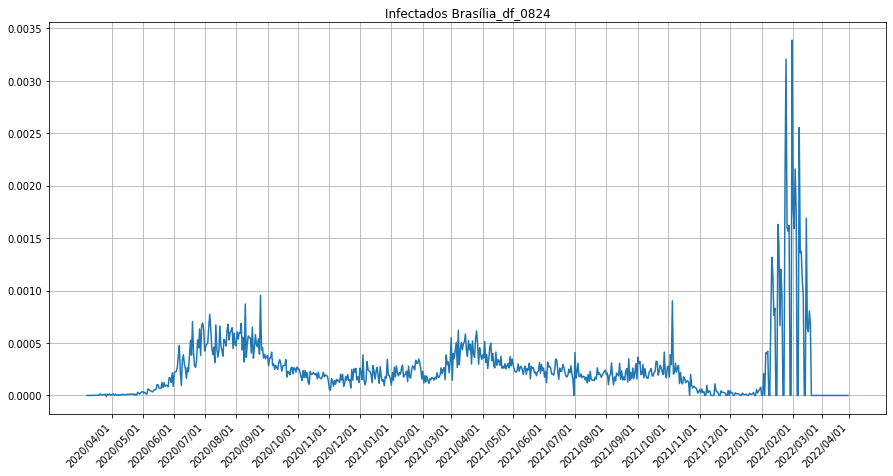

In [18]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/cidades_brasileiras_idh_casos.csv', index_col=0)

Brasília_df_0824_populacao = 3094325

dados0_y_Brasília_df_0824 = dados0['Brasília_df_0824'].to_numpy()/Brasília_df_0824_populacao
dados0_x_Brasília_df_0824 = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_Brasília_df_0824, dados0_y_Brasília_df_0824)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados Brasília_df_0824')

# joacaba_sc_0827

Text(0.5, 1.0, 'Infectados joacaba_sc_0827')

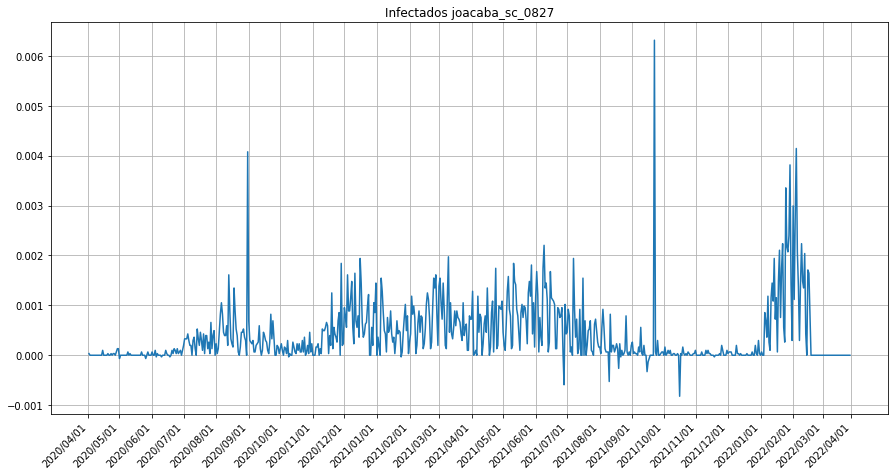

In [19]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/cidades_brasileiras_idh_casos.csv', index_col=0)

joacaba_sc_0827_populacao = 30404

dados0_y_joacaba_sc_0827 = dados0['joacaba_sc_0827'].to_numpy()/joacaba_sc_0827_populacao
dados0_x_joacaba_sc_0827 = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_joacaba_sc_0827, dados0_y_joacaba_sc_0827)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados joacaba_sc_0827')

# balneario_camboriu_sc_0845

Text(0.5, 1.0, 'Infectados joacaba_sc_0827')

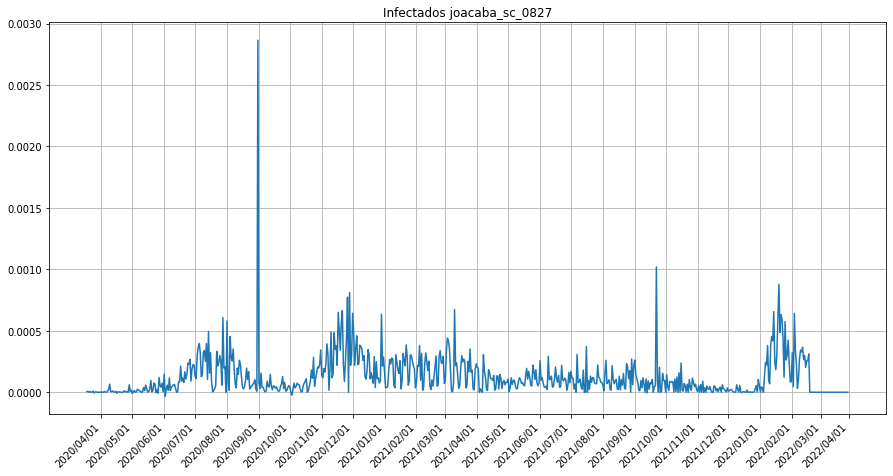

In [20]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/cidades_brasileiras_idh_casos.csv', index_col=0)

balneario_camboriu_sc_0845_populacao = 365855

dados0_y_balneario_camboriu_sc_0845 = dados0['balneario_camboriu_sc_0845'].to_numpy()/balneario_camboriu_sc_0845_populacao
dados0_x_balneario_camboriu_sc_0845 = dados0.index.to_numpy()

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(dados0_x_balneario_camboriu_sc_0845, dados0_y_balneario_camboriu_sc_0845)
ax.grid(True)
ax.set_xticks(labels_lista)
fig.autofmt_xdate(rotation=45)
plt.title('Infectados joacaba_sc_0827')

# Gráfico com os dados das cidades

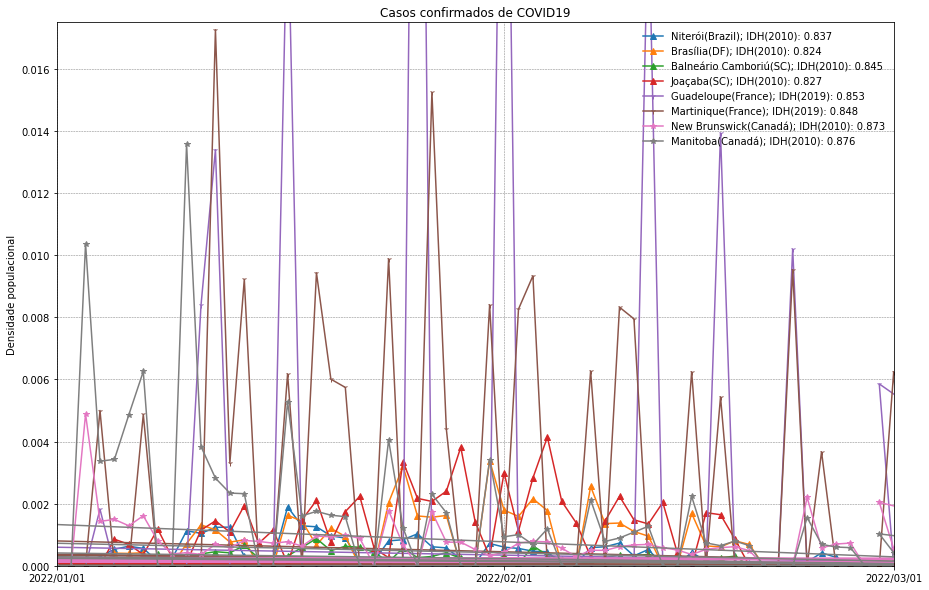

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

# Brazil

ax.plot(dados0_x_niteroi, dados0_y_niteroi,marker="^",label='Niterói(Brazil); IDH(2010): 0.837')

ax.plot(dados0_x_Brasília_df_0824, dados0_y_Brasília_df_0824, marker="^", label='Brasília(DF); IDH(2010): 0.824')

ax.plot(dados0_x_balneario_camboriu_sc_0845, dados0_y_balneario_camboriu_sc_0845, marker="^", label='Balneário Camboriú(SC); IDH(2010): 0.845')

ax.plot(dados0_x_joacaba_sc_0827, dados0_y_joacaba_sc_0827, marker="^", label='Joaçaba(SC); IDH(2010): 0.827')


#ax[0].scatter(dados0_x_rj, dados0_y_rj,label='Rio de Janeiro(Brazil); IDH(2010): 0.799')
#ax[0].scatter(dados0_x_tangua, dados0_y_tangua, label='Tanguá(Brazil); IDH(2010): 0.654')



# France

ax.plot(dados0_x_Guadeloupe, dados0_y_Guadeloupe,marker="1", label='Guadeloupe(France); IDH(2019): 0.853')

ax.plot(dados0_x_Martinique, dados0_y_Martinique,marker="1", label='Martinique(France); IDH(2019): 0.848')


# Canadá

#ax.scatter(dados0_x_Saskatchewan, dados0_y_Saskatchewan, label='Saskatchewan(Canadá); IDH(2010): 0.891')

#ax.scatter(dados0_x_Quebec, dados0_y_Quebec, label='Quebec(Canadá); IDH(2010): 0.886')

#ax.scatter(dados0_x_Nova_Scotia, dados0_y_Nova_Scotia, label='Nova Scotia(Canadá); IDH(2010): 0.878')

#ax.scatter(dados0_x_Newfoundland_and_Labrador, dados0_y_Newfoundland_and_Labrador, label='Newfoundland and Labrador(Canadá); IDH(2010): 0.874')

ax.plot(dados0_x_New_Brunswick, dados0_y_New_Brunswick,marker='*', label='New Brunswick(Canadá); IDH(2010): 0.873')

ax.plot(dados0_x_Manitoba, dados0_y_Manitoba,marker='*', label='Manitoba(Canadá); IDH(2010): 0.876')



ax.legend(frameon=False)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.set_xticks(labels_lista)
#fig.autofmt_xdate(rotation=45)

ax.set_xlim(['2022/01/01','2022/03/01'])
ax.set_ylim([0,0.0175])
ax.set_title('Casos confirmados de COVID19')
ax.set_ylabel('Densidade populacional')

plt.savefig('cidades.pdf')

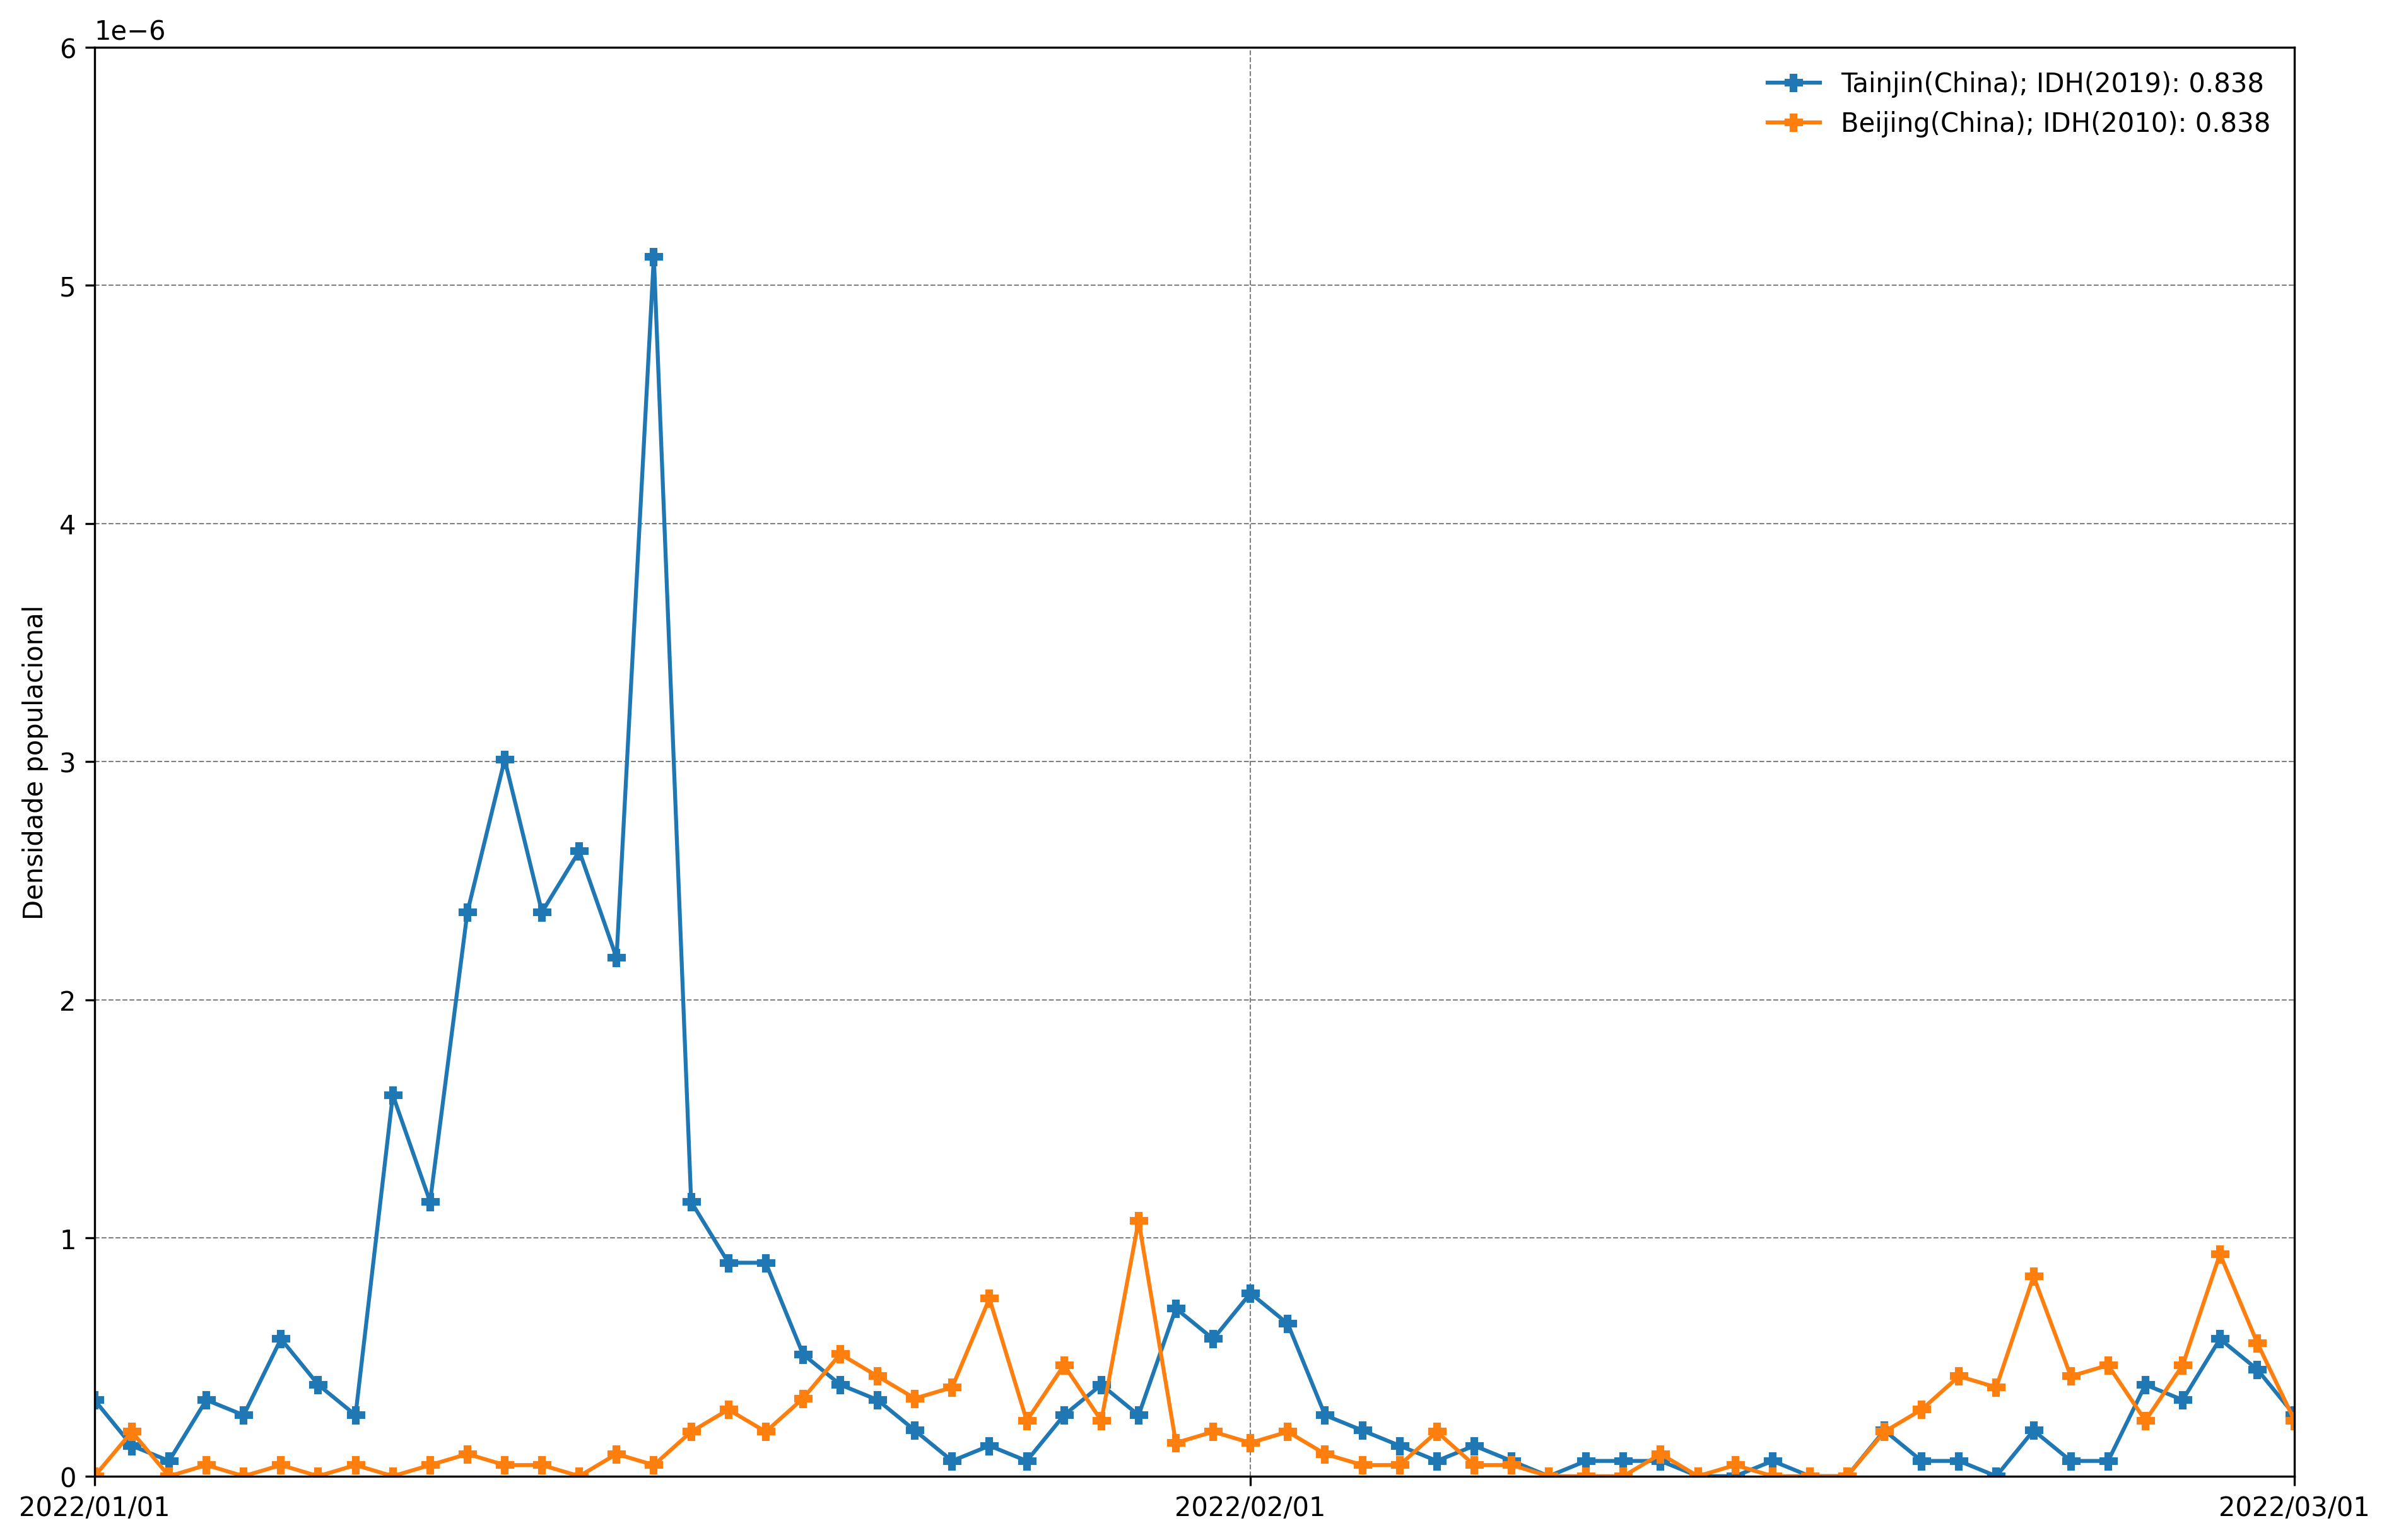

In [38]:
fig, ax = plt.subplots(figsize=(15,10),dpi=300)

# China

ax.plot(dados0_x_tainjin, dados0_y_tainjin, marker="P",label='Tainjin(China); IDH(2019): 0.838')

ax.plot(dados0_x_Beijing, dados0_y_Beijing, marker="P", label='Beijing(China); IDH(2010): 0.838')

ax.legend(frameon=False)
ax.set_xticks(labels_lista)
ax.grid(True, color='gray', linestyle='--', linewidth=0.5)
#fig.autofmt_xdate(rotation=45)

ax.set_xlim(['2022/01/01','2022/03/01'])
ax.set_ylim([0,0.000006])
ax.set_ylabel('Densidade populacional')

plt.savefig('China.pdf')

# 

# ##########################################################


















# Tianjin - China – 0.838

In [604]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
dados0 = pd.read_csv(url, index_col=0)

In [480]:
dados1 = dados0.loc['Tianjin']['1/22/20':'4/20/22']
arr = dados1.index.to_numpy()
arr

array(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20',
       '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20',
       '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20',
       '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20',
       '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20',
       '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20',
       '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20',
       '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20',
       '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20',
       '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20',
       '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20',
     

In [481]:
lista = arr
for i in range(len(arr)):
    b = lista[i].split('/')
    b[0], b[-1] = b[-1], b[0]
    b[1], b[-1] = b[-1], b[1]
    c = '/'.join(b)
    lista[i] = c
lista

array(['20/1/22', '20/1/23', '20/1/24', '20/1/25', '20/1/26', '20/1/27',
       '20/1/28', '20/1/29', '20/1/30', '20/1/31', '20/2/1', '20/2/2',
       '20/2/3', '20/2/4', '20/2/5', '20/2/6', '20/2/7', '20/2/8',
       '20/2/9', '20/2/10', '20/2/11', '20/2/12', '20/2/13', '20/2/14',
       '20/2/15', '20/2/16', '20/2/17', '20/2/18', '20/2/19', '20/2/20',
       '20/2/21', '20/2/22', '20/2/23', '20/2/24', '20/2/25', '20/2/26',
       '20/2/27', '20/2/28', '20/2/29', '20/3/1', '20/3/2', '20/3/3',
       '20/3/4', '20/3/5', '20/3/6', '20/3/7', '20/3/8', '20/3/9',
       '20/3/10', '20/3/11', '20/3/12', '20/3/13', '20/3/14', '20/3/15',
       '20/3/16', '20/3/17', '20/3/18', '20/3/19', '20/3/20', '20/3/21',
       '20/3/22', '20/3/23', '20/3/24', '20/3/25', '20/3/26', '20/3/27',
       '20/3/28', '20/3/29', '20/3/30', '20/3/31', '20/4/1', '20/4/2',
       '20/4/3', '20/4/4', '20/4/5', '20/4/6', '20/4/7', '20/4/8',
       '20/4/9', '20/4/10', '20/4/11', '20/4/12', '20/4/13', '20/4/14',
     

In [482]:
lista0 = lista
for i in range(len(lista0)):
    b = lista0[i].split('/')
    if b[0] == '20':
        b[0] = '2020'
    if b[0] == '21':
        b[0] = '2021'
    if b[0] == '22':
        b[0] = '2022'
    c = '/'.join(b)
    lista0[i] = c
lista0

array(['2020/1/22', '2020/1/23', '2020/1/24', '2020/1/25', '2020/1/26',
       '2020/1/27', '2020/1/28', '2020/1/29', '2020/1/30', '2020/1/31',
       '2020/2/1', '2020/2/2', '2020/2/3', '2020/2/4', '2020/2/5',
       '2020/2/6', '2020/2/7', '2020/2/8', '2020/2/9', '2020/2/10',
       '2020/2/11', '2020/2/12', '2020/2/13', '2020/2/14', '2020/2/15',
       '2020/2/16', '2020/2/17', '2020/2/18', '2020/2/19', '2020/2/20',
       '2020/2/21', '2020/2/22', '2020/2/23', '2020/2/24', '2020/2/25',
       '2020/2/26', '2020/2/27', '2020/2/28', '2020/2/29', '2020/3/1',
       '2020/3/2', '2020/3/3', '2020/3/4', '2020/3/5', '2020/3/6',
       '2020/3/7', '2020/3/8', '2020/3/9', '2020/3/10', '2020/3/11',
       '2020/3/12', '2020/3/13', '2020/3/14', '2020/3/15', '2020/3/16',
       '2020/3/17', '2020/3/18', '2020/3/19', '2020/3/20', '2020/3/21',
       '2020/3/22', '2020/3/23', '2020/3/24', '2020/3/25', '2020/3/26',
       '2020/3/27', '2020/3/28', '2020/3/29', '2020/3/30', '2020/3/31',
       '20

In [483]:
lista1 = lista0
for i in range(len(lista1)):
    b = lista1[i].split('/')
    if b[1] in ['1','2','3','4','5','6','7','8','9']  and '0' not in b[1]:
        b[1] = '0' + b[1]
    c = '/'.join(b)
    lista1[i] = c
lista1

array(['2020/01/22', '2020/01/23', '2020/01/24', '2020/01/25',
       '2020/01/26', '2020/01/27', '2020/01/28', '2020/01/29',
       '2020/01/30', '2020/01/31', '2020/02/1', '2020/02/2', '2020/02/3',
       '2020/02/4', '2020/02/5', '2020/02/6', '2020/02/7', '2020/02/8',
       '2020/02/9', '2020/02/10', '2020/02/11', '2020/02/12',
       '2020/02/13', '2020/02/14', '2020/02/15', '2020/02/16',
       '2020/02/17', '2020/02/18', '2020/02/19', '2020/02/20',
       '2020/02/21', '2020/02/22', '2020/02/23', '2020/02/24',
       '2020/02/25', '2020/02/26', '2020/02/27', '2020/02/28',
       '2020/02/29', '2020/03/1', '2020/03/2', '2020/03/3', '2020/03/4',
       '2020/03/5', '2020/03/6', '2020/03/7', '2020/03/8', '2020/03/9',
       '2020/03/10', '2020/03/11', '2020/03/12', '2020/03/13',
       '2020/03/14', '2020/03/15', '2020/03/16', '2020/03/17',
       '2020/03/18', '2020/03/19', '2020/03/20', '2020/03/21',
       '2020/03/22', '2020/03/23', '2020/03/24', '2020/03/25',
       '2020/03/2

In [484]:
lista2 = lista1
for i in range(len(arr)):
    b = lista2[i].split('/')
    if b[2] in ['1','2','3','4','5','6','7','8','9'] and '0' not in b[2]:
        b[2] = '0' + b[2]
    c = '/'.join(b)
    lista2[i] = c
lista2

array(['2020/01/22', '2020/01/23', '2020/01/24', '2020/01/25',
       '2020/01/26', '2020/01/27', '2020/01/28', '2020/01/29',
       '2020/01/30', '2020/01/31', '2020/02/01', '2020/02/02',
       '2020/02/03', '2020/02/04', '2020/02/05', '2020/02/06',
       '2020/02/07', '2020/02/08', '2020/02/09', '2020/02/10',
       '2020/02/11', '2020/02/12', '2020/02/13', '2020/02/14',
       '2020/02/15', '2020/02/16', '2020/02/17', '2020/02/18',
       '2020/02/19', '2020/02/20', '2020/02/21', '2020/02/22',
       '2020/02/23', '2020/02/24', '2020/02/25', '2020/02/26',
       '2020/02/27', '2020/02/28', '2020/02/29', '2020/03/01',
       '2020/03/02', '2020/03/03', '2020/03/04', '2020/03/05',
       '2020/03/06', '2020/03/07', '2020/03/08', '2020/03/09',
       '2020/03/10', '2020/03/11', '2020/03/12', '2020/03/13',
       '2020/03/14', '2020/03/15', '2020/03/16', '2020/03/17',
       '2020/03/18', '2020/03/19', '2020/03/20', '2020/03/21',
       '2020/03/22', '2020/03/23', '2020/03/24', '2020/

In [485]:
pd.DataFrame(lista2).to_csv('Dias_formatados.csv')

In [598]:
matriz = pd.DataFrame(dados1.to_numpy(),lista2)
matriz.head(20)

,0
2020/01/22,4
2020/01/23,4
2020/01/24,8
2020/01/25,10
2020/01/26,14
2020/01/27,23
2020/01/28,24
2020/01/29,27
2020/01/30,31
2020/01/31,32


In [599]:
matriz.rename(columns={0: 'Tainjin - China - IDH = 0.838'}, inplace = True)
matriz

,Tainjin - China - IDH = 0.838
2020/01/22,4
2020/01/23,4
2020/01/24,8
2020/01/25,10
2020/01/26,14
...,...
2022/04/16,1800
2022/04/17,1800
2022/04/18,1800
2022/04/19,1800


In [600]:
matriz.to_csv('Tainjin_China.csv')

In [601]:
nova = matriz['Tainjin - China - IDH = 0.838']
nova

2020/01/22       4
2020/01/23       4
2020/01/24       8
2020/01/25      10
2020/01/26      14
              ... 
2022/04/16    1800
2022/04/17    1800
2022/04/18    1800
2022/04/19    1800
2022/04/20    1800
Name: Tainjin - China - IDH = 0.838, Length: 820, dtype: object

In [605]:
dados2 = dados0.loc['Reunion']['1/22/20':'4/20/22']
dados2.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 5, 6, 7, 9, 9, 12, 14, 28, 45, 64, 71, 94,
       111, 135, 145, 183, 183, 224, 247, 281, 308, 321, 334, 344, 349,
       358, 358, 362, 382, 388, 389, 391, 391, 391, 394, 402, 407, 408,
       408, 410, 410, 412, 412, 417, 417, 418, 418, 420, 420, 422, 423,
       423, 424, 424, 425, 427, 426, 431, 436, 436, 437, 439, 440, 441,
       443, 443, 446, 446, 447, 449, 449, 452, 452, 456, 459, 460, 465,
       470, 471, 471, 473, 477, 478, 479, 480, 480, 480, 481, 481, 486,
       487, 488, 489, 495, 496, 495, 497, 502, 504, 505, 506, 507, 507,
       508, 516, 517, 520, 521, 522, 526, 528, 531, 533, 536, 547, 550,
       551, 563, 566, 571, 577, 593, 596, 599, 608, 612, 614, 624, 628,
       631, 639, 645, 646, 654, 657, 657, 657, 657, 657, 657, 660, 664,
       667, 667, 669, 670, 671, 675, 681, 687, 690, 702, 734, 7

In [606]:
var = pd.DataFrame(dados2.to_numpy(),lista2)
var

,0
2020/01/22,0
2020/01/23,0
2020/01/24,0
2020/01/25,0
2020/01/26,0
...,...
2022/04/16,360445
2022/04/17,360445
2022/04/18,360445
2022/04/19,360445


In [607]:
matriz0 = pd.concat([matriz,var], axis=1)
matriz0

,Tainjin - China - IDH = 0.838,0
2020/01/22,4,0
2020/01/23,4,0
2020/01/24,8,0
2020/01/25,10,0
2020/01/26,14,0
...,...,...
2022/04/16,1800,360445
2022/04/17,1800,360445
2022/04/18,1800,360445
2022/04/19,1800,360445


In [608]:
matriz0.rename(columns={0: 'Reunion – France – IDH = 0.843'}, inplace = True)
matriz0
#matriz0.to_csv('Tainjin e Reunion.csv')

,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843
2020/01/22,4,0
2020/01/23,4,0
2020/01/24,8,0
2020/01/25,10,0
2020/01/26,14,0
...,...,...
2022/04/16,1800,360445
2022/04/17,1800,360445
2022/04/18,1800,360445
2022/04/19,1800,360445


In [619]:
dados3 = dados0.loc['Martinique']['1/22/20':'4/20/22']
#dados3.to_numpy()

var0 = pd.DataFrame(dados3.to_numpy(),lista2)

matriz1 = pd.concat([matriz0,var0], axis=1)
matriz1

matriz1.rename(columns={0: 'Martinique – France – IDH = 0.848'}, inplace = True)
matriz1
matriz1.to_csv('Tainjin e Reunion e Martinique.csv')

In [620]:
dados4 = dados0.loc['Guadeloupe']['1/22/20':'4/20/22']
#dados3.to_numpy()

var1 = pd.DataFrame(dados4.to_numpy(),lista2)

matriz2 = pd.concat([matriz1,var1], axis=1)

matriz2.rename(columns={0: 'Guadeloupe – France – IDH = 0.853'}, inplace = True)
matriz2
matriz2.to_csv('Tainjin e Reunion e Martinique e Guadeloupe.csv')

In [623]:
matriz2.to_csv('IDH_cidades.csv')

In [625]:
arquivo = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/IDH_cidades.csv', index_col=0)
arquivo

,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
2020/01/22,4,0,0,0
2020/01/23,4,0,0,0
2020/01/24,8,0,0,0
2020/01/25,10,0,0,0
2020/01/26,14,0,0,0
...,...,...,...,...
2022/04/16,1800,360445,148332,142573
2022/04/17,1800,360445,148332,142573
2022/04/18,1800,360445,148332,142573
2022/04/19,1800,360445,149259,145228


In [626]:
tai = arquivo['Tainjin - China - IDH = 0.838'].to_numpy()

lista_tai = []
for i in range(1,len(tai)):
    lista_tai.append(tai[i] - tai[i-1])
lista_tai = np.array(lista_tai)

    
reu = arquivo['Reunion – France – IDH = 0.843'].to_numpy()

lista_reu = []
for i in range(1,len(reu)):
    lista_reu.append(reu[i] - reu[i-1])
lista_reu = np.array(lista_reu)


mar = arquivo['Martinique – France – IDH = 0.848'].to_numpy()

lista_mar = []
for i in range(1,len(mar)):
    lista_mar.append(mar[i] - mar[i-1])
lista_mar = np.array(lista_mar)
    
    
gua = arquivo['Guadeloupe – France – IDH = 0.853'].to_numpy()

lista_gua = []
for i in range(1,len(gua)):
    lista_gua.append(gua[i] - gua[i-1])
lista_gua = np.array(lista_gua)

In [716]:
arquivo.tail(30)

,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
2022/03/22,1659,318695,138039,132359
2022/03/23,1688,327189,138039,132359
2022/03/24,1713,327189,138039,132359
2022/03/25,1748,327189,142024,132359
2022/03/26,1765,327189,142024,132359
2022/03/27,1773,327189,142024,132359
2022/03/28,1780,327189,143175,135981
2022/03/29,1782,336945,143175,135981
2022/03/30,1786,336945,144314,135981
2022/03/31,1787,336945,144314,135981


In [719]:
arquivo2 = arquivo.T.drop(columns=['2020/01/22']).T
arquivo2.tail(30)

,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
2022/03/22,1659,318695,138039,132359
2022/03/23,1688,327189,138039,132359
2022/03/24,1713,327189,138039,132359
2022/03/25,1748,327189,142024,132359
2022/03/26,1765,327189,142024,132359
2022/03/27,1773,327189,142024,132359
2022/03/28,1780,327189,143175,135981
2022/03/29,1782,336945,143175,135981
2022/03/30,1786,336945,144314,135981
2022/03/31,1787,336945,144314,135981


In [718]:
dic = pd.DataFrame({'Datas': arquivo2.index, 'Tainjin - China - IDH = 0.838': lista_tai, 'Reunion – France – IDH = 0.843': lista_reu, 'Martinique – France – IDH = 0.848': lista_mar, 'Guadeloupe – France – IDH = 0.853':lista_gua})
dic.

,Datas,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
789,2022/03/22,28,0,0,0
790,2022/03/23,29,8494,0,0
791,2022/03/24,25,0,0,0
792,2022/03/25,35,0,3985,0
793,2022/03/26,17,0,0,0
794,2022/03/27,8,0,0,0
795,2022/03/28,7,0,1151,3622
796,2022/03/29,2,9756,0,0
797,2022/03/30,4,0,1139,0
798,2022/03/31,1,0,0,0


In [652]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/4_cidades.csv', index_col=1)
dados1 = dados0.set_index('Datas')
dados1.to_csv('4_cidades.csv')

In [651]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/4_cidades.csv', index_col=0)
dados0

,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
Datas,,,
2020/01/23,0,0,0
2020/01/24,0,0,0
2020/01/25,0,0,0
2020/01/26,0,0,0
2020/01/27,0,0,0
2020/01/28,0,0,0
2020/01/29,0,0,0
2020/01/30,0,0,0
2020/01/31,0,0,0


In [16]:
"""dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/c4_cidades.csv', index_col=1)
dados0.drop(columns=['Unnamed: 0'])
dados0.to_csv('4_cidades.csv')"""

"dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/c4_cidades.csv', index_col=1)\ndados0.drop(columns=['Unnamed: 0'])\ndados0.to_csv('4_cidades.csv')"

In [69]:
dados0 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/GDL-Sub-national-HDI-data.csv', index_col=4)
dados0

,Country,ISO_Code,Level,GDLCODE,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,,,,,,,,,,
Total,Afghanistan,AFG,National,AFGt,0.302,0.308,0.314,0.312,0.307,0.331,...,0.471,0.477,0.490,0.497,0.500,0.499,0.502,0.506,0.509,0.511
Central (Kabul Wardak Kapisa Logar Parwan Panjsher),Afghanistan,AFG,Subnat,AFGr101,0.373,0.379,0.385,0.383,0.378,0.406,...,0.571,0.573,0.582,0.584,0.582,0.577,0.580,0.585,0.589,0.591
Central Highlands (Bamyan Daikundi),Afghanistan,AFG,Subnat,AFGr102,0.307,0.313,0.320,0.319,0.313,0.339,...,0.489,0.490,0.498,0.499,0.497,0.490,0.493,0.496,0.498,0.501
East (Nangarhar Kunar Laghman Nooristan),Afghanistan,AFG,Subnat,AFGr103,0.319,0.324,0.330,0.327,0.321,0.347,...,0.491,0.489,0.494,0.494,0.489,0.481,0.484,0.488,0.491,0.493
North (Samangan Sar-e-Pul Balkh Jawzjan Faryab),Afghanistan,AFG,Subnat,AFGr104,0.283,0.289,0.295,0.294,0.289,0.313,...,0.450,0.465,0.486,0.501,0.512,0.518,0.521,0.525,0.528,0.530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mashonaland West,Zimbabwe,ZWE,Subnat,ZWEr104,0.430,0.432,0.419,0.415,0.411,0.410,...,0.459,0.475,0.502,0.516,0.529,0.535,0.538,0.539,0.541,0.539
Masvingo,Zimbabwe,ZWE,Subnat,ZWEr108,0.450,0.452,0.438,0.434,0.430,0.428,...,0.455,0.473,0.504,0.522,0.539,0.550,0.555,0.560,0.566,0.566
Matebeleland North,Zimbabwe,ZWE,Subnat,ZWEr105,0.430,0.432,0.419,0.415,0.411,0.413,...,0.454,0.476,0.499,0.508,0.516,0.518,0.520,0.521,0.523,0.520


In [70]:
maior = dados['2010'][dados['2010'] > 0.800]
menor = maior[maior < 0.900]
menor

Region
Total                                                       0.838
Total                                                       0.829
Catamarca, La Rioja, San Juan                               0.830
Chaco, Formosa                                              0.805
Chubut, Neuquen, Rio Negro, Santa Cruz, Tierra del Fuego    0.836
                                                            ...  
South Carolina                                              0.887
Tennessee                                                   0.889
West Virginia                                               0.874
Montevideo and Metropolitan area                            0.804
Federal District                                            0.803
Name: 2010, Length: 283, dtype: float64

In [71]:
menor.index

Index(['Total', 'Total', 'Catamarca, La Rioja, San Juan', 'Chaco, Formosa',
       'Chubut, Neuquen, Rio Negro, Santa Cruz, Tierra del Fuego',
       'City of Buenos Aires', 'Cordoba', 'Corrientes, Entre Rios, Misiones',
       'Jujuy, Salta', 'La Pampa, San Luis, Mendoza',
       ...
       'Kentucky', 'Louisiana', 'Mississippi', 'New Mexico', 'Oklahoma',
       'South Carolina', 'Tennessee', 'West Virginia',
       'Montevideo and Metropolitan area', 'Federal District'],
      dtype='object', name='Region', length=283)

In [72]:
dados1 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/time_series_covid19_confirmed_global.csv', index_col=0)
dados1

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,4/11/22,4/12/22,4/13/22
Province/State,,,,,,,,,,,,,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,...,177897,177932,177974,177974,177974,177974,177974,178141,178257,178295
NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,273913,274000,274055,274108,274136,274191,274219,274219,274272,274320
NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,265694,265699,265705,265707,265714,265720,265724,265727,265730,265731
NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,40024,40024,40024,40328,40328,40328,40328,40328,40328,40709
NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,...,656287,656287,656287,656287,656287,656287,656287,656287,656617,656617
NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,11808,11812,11812,11812,11812,11813,11813,11814,11814,11815


In [73]:
lista = []
for i in dados1.index:
    if i in menor.index:
        lista.append(i)
lista

['Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Quebec',
 'Saskatchewan',
 'Beijing',
 'Shanghai',
 'Guadeloupe',
 'Martinique',
 'Reunion']

In [108]:
Manitoba_IDH = dados0.loc['Manitoba']['2010']

Manitoba_dados = dados1.loc['Manitoba']['1/22/20':'4/13/22']

lista_mani = []
for i in range(1,len(Manitoba_dados)):
    lista_mani.append(Manitoba_dados[i] - Manitoba_dados[i-1])
lista_mani = np.array(lista_mani)
lista_mani

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    4,    0,    0,    3,    1,
          7,    2,    0,    1,    2,    0,    1,   14,    1,    3,   25,
          8,   24,    7,   24,   40,   15,    0,   21,    0,   14,    0,
          4,    9,   13,   -1,    4,    0,    0,    4,    0,    3,    1,
          0,    1,    2,    5,    1,    4,    4,    2,    0,    2,    2,
          4,    1,    0,    1,    1,    2,   -3,    1,    0,    3,    2,
          1,    0,   -1,    0,    0,    0,    1,    0,    0,    0,    2,
          0,    0,    0,    0,    0,    2,    0,    0,    1,    0,    2,
          1,    0,    2,    0,    0,    0,    0,    0,    0,    1,    2,
          1,    0,    0,    2,    2,    3,    2,   

In [107]:
New_Brunswick_IDH = dados0.loc['New Brunswick']['2010']

New_Brunswick_dados = dados1.loc['New Brunswick']['1/22/20':'4/13/22']

lista_bru = []
for i in range(1,len(New_Brunswick_dados)):
    lista_bru.append(New_Brunswick_dados[i] - New_Brunswick_dados[i-1])
lista_bru = np.array(lista_bru)
lista_bru

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    1,    4,    2,
          3,    0,    0,    6,    0,    0,    1,    0,   15,   12,    6,
         15,    2,    2,   11,   10,    0,    0,    7,    5,    2,    0,
          3,    4,    0,    2,    2,    0,    1,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    1,    1,    3,    2,    1,    3,    0,    1,
          2,    1,    0,    0,    1,    9,    1,    4,    2,    1,    3,
          0,    3,    3,    1,    0,    0,    0,   

In [106]:
Newfoundland_and_Labrador_IDH = dados0.loc['Newfoundland and Labrador']['2010']

Newfoundland_and_Labrador_dados = dados1.loc['Newfoundland and Labrador']['1/22/20':'4/13/22']

lista_new = []
for i in range(1,len(Newfoundland_and_Labrador_dados)):
    lista_new.append(Newfoundland_and_Labrador_dados[i] - Newfoundland_and_Labrador_dados[i-1])
lista_new = np.array(lista_new)
lista_new

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    1,    0,    2,
          0,    0,    1,    2,    3,   15,   11,    0,   47,   20,   18,
         15,   13,    4,   23,    8,    0,   12,   22,    9,    2,    4,
          4,    3,    2,    1,    2,    0,    3,    5,    4,    0,    0,
          0,    0,    0,    0,    0,    1,    1,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [105]:
Nova_Scotia_IDH = dados0.loc['Nova Scotia']['2010']

Nova_Scotia_dados = dados1.loc['Nova Scotia']['1/22/20':'4/13/22']

lista_nov = []
for i in range(1,len(Nova_Scotia_dados)):
    lista_nov.append(Nova_Scotia_dados[i] - Nova_Scotia_dados[i-1])
lista_nov = np.array(lista_nov)
lista_nov

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    5,    2,
          5,    2,    1,    6,    7,   13,   10,   17,    5,   17,   20,
         12,    5,   20,   26,   20,   14,   29,   26,   31,   17,   32,
         31,   34,   21,   17,   29,   43,   32,   30,   27,   43,   26,
         46,   16,   35,   55,   23,   15,    8,   27,   15,   20,   12,
         12,    4,    8,   14,    6,    7,    9,    1,    3,    7,    1,
          1,    4,    2,    8,    3,    3,    3,    1,    1,    1,    2,
          1,    1,    1,    1,    1,    2,    0,    1,    0,    1,    0,
          1,    0,    0,    0,    1,    0,    1,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [104]:
Quebec_IDH = dados0.loc['Quebec']['2010']

Quebec_dados = dados1.loc['Quebec']['1/22/20':'4/13/22']

lista_que = []
for i in range(1,len(Quebec_dados)):
    lista_que.append(Quebec_dados[i] - Quebec_dados[i-1])
lista_que = np.array(lista_que)
lista_que

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,     0,     0,
           1,     0,     1,     3,     2,     2,     1,     2,     0,
           1,     1,     2,    10,     6,     4,    18,    13,    17,
          43,    41,    73,   129,   186,   238,   345,   268,   366,
         366,   451,   416,   568,   578,   728,   697,   875,   770,
         806,   634,   875,   788,   686,   748,   635,   665,   790,
         964,   962,  1098,   964,  1022,   663,   820,   909,   806,
         885,   906,   855,   762,   612,   910,   920,   898,  1003,
        1053,   899,   791,   865,   893,  1033,   851,   778,   752,
         653,   725,   797,   780,   700,   782,   696,   731,   670,
         638,   801,   715,   605,   502,   544,   508,   448,   520,
         415,   423,

In [103]:
Saskatchewan_IDH = dados0.loc['Saskatchewan']['2010']

Saskatchewan_dados = dados1.loc['Saskatchewan']['1/22/20':'4/13/22']

lista_sas = []
for i in range(1,len(Saskatchewan_dados)):
    lista_sas.append(Saskatchewan_dados[i] - Saskatchewan_dados[i-1])
lista_sas = np.array(lista_sas)
lista_sas

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    2,    0,    0,    5,    0,
          1,    8,    4,    6,   26,   14,    6,   14,    9,    9,   30,
          0,   41,    9,    9,   13,   14,   11,   18,    4,    7,   11,
          7,    7,    4,    9,    2,    1,    3,    1,    2,    6,    2,
          1,    4,    6,    5,   10,    8,    4,   12,    1,   17,    6,
         26,    6,   12,   34,   20,   25,   19,   13,    9,   11,    4,
          5,    4,    5,    8,    1,    1,    0,    7,   21,    2,    5,
          3,    2,    2,    0,    3,    2,    2,    4,    1,    0,    0,
          1,    1,    1,    1,    0,    4,    2,    2,    2,    3,    1,
          1,   18,    1,    9,   15,    8,   10,   

In [102]:
Beijing_IDH = dados0.loc['Beijing']['2010']

Beijing_dados = dados1.loc['Beijing']['1/22/20':'4/13/22']

lista_bei = []
for i in range(1,len(Beijing_dados)):
    lista_bei.append(Beijing_dados[i] - Beijing_dados[i-1])
lista_bei = np.array(lista_bei)
lista_bei

array([ 8, 14,  5, 27, 12, 11, 20,  3, 25, 29, 23, 21, 16, 25, 21, 23, 18,
       11, 11,  5, 10, 14,  6,  3,  5,  1,  6,  6,  2,  1,  3,  0,  0,  1,
        0, 10,  0,  1,  2,  1,  0,  4,  0,  4,  4,  2,  0,  1,  6,  0,  1,
        1,  5, 10,  4, 13, 11, 11, 13, 18, 15, 21,  3,  5,  3,  4,  4,  0,
        3,  0,  2,  2,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  3,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  1,  6, 36, 36, 27, 31, 21, 25,  0, 44,  9, 13,  7,
       13, 11, 17, 14,  7,  7,  3,  1,  2,  1,  2,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [116]:
dic = {f'Beijing(China); IDH(2010): {Beijing_IDH}':lista_bei, 
       f'Saskatchewan(Canadá); IDH(2010): {round(Saskatchewan_IDH,3)}':lista_sas,
       f'Quebec(Canadá); IDH(2010): {round(Quebec_IDH,3)}':lista_que,
       f'Nova Scotia(Canadá); IDH(2010): {Nova_Scotia_IDH}':lista_nov,
       f'Newfoundland and Labrador(Canadá); IDH(2010): {round(Newfoundland_and_Labrador_IDH,3)}':lista_new,
       f'New Brunswick(Canadá); IDH(2010): {New_Brunswick_IDH}':lista_bru,
       f'Manitoba(Canadá); IDH(2010): {round(Manitoba_IDH,3)}':lista_mani,
}
dados2 = pd.DataFrame(dic)
#dados2.to_csv('Novas_cidades.csv')
dados2

,Beijing(China); IDH(2010): 0.838,Saskatchewan(Canadá); IDH(2010): 0.891,Quebec(Canadá); IDH(2010): 0.886,Nova Scotia(Canadá); IDH(2010): 0.878,Newfoundland and Labrador(Canadá); IDH(2010): 0.874,New Brunswick(Canadá); IDH(2010): 0.873,Manitoba(Canadá); IDH(2010): 0.876
0,8,0,0,0,0,0,0
1,14,0,0,0,0,0,0
2,5,0,0,0,0,0,0
3,27,0,0,0,0,0,0
4,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...
807,4,1032,3572,6991,0,0,0
808,1,0,0,0,0,0,0
809,4,0,0,0,0,0,0
810,0,0,0,0,0,0,0


In [119]:
dados3 = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/csv/4_cidades.csv', index_col=0)
dados3.index

Index(['2020/01/23', '2020/01/24', '2020/01/25', '2020/01/26', '2020/01/27',
       '2020/01/28', '2020/01/29', '2020/01/30', '2020/01/31', '2020/02/01',
       ...
       '2022/04/11', '2022/04/12', '2022/04/13', '2022/04/14', '2022/04/15',
       '2022/04/16', '2022/04/17', '2022/04/18', '2022/04/19', '2022/04/20'],
      dtype='object', name='Datas', length=819)

In [124]:
datas = pd.DataFrame(dados3.index)
datas

,Datas
0,2020/01/23
1,2020/01/24
2,2020/01/25
3,2020/01/26
4,2020/01/27
...,...
814,2022/04/16
815,2022/04/17
816,2022/04/18
817,2022/04/19


In [131]:
dados4 = pd.concat([dados2,datas], axis=1)
dados4 = dados4.set_index('Datas')
dados4.tail(60)

,Beijing(China); IDH(2010): 0.838,Saskatchewan(Canadá); IDH(2010): 0.891,Quebec(Canadá); IDH(2010): 0.886,Nova Scotia(Canadá); IDH(2010): 0.878,Newfoundland and Labrador(Canadá); IDH(2010): 0.874,New Brunswick(Canadá); IDH(2010): 0.873,Manitoba(Canadá); IDH(2010): 0.876
Datas,,,,,,,
2022/02/20,9.0,0.0,1197.0,0.0,124.0,0.0,0.0
2022/02/21,8.0,0.0,1064.0,734.0,237.0,0.0,0.0
2022/02/22,18.0,0.0,1438.0,0.0,246.0,1148.0,810.0
2022/02/23,9.0,0.0,1861.0,111.0,248.0,300.0,361.0
2022/02/24,10.0,0.0,1517.0,200.0,287.0,365.0,315.0
2022/02/25,5.0,1407.0,1542.0,187.0,392.0,382.0,305.0
2022/02/26,10.0,0.0,0.0,0.0,296.0,0.0,0.0
2022/02/27,20.0,0.0,2211.0,0.0,256.0,0.0,0.0
2022/02/28,12.0,0.0,845.0,170.0,327.0,1065.0,536.0


In [132]:
dados5 = pd.concat([dados4,dados3],axis=1)
dados5.to_csv('Cidades_IDH.csv')
dados5

,Beijing(China); IDH(2010): 0.838,Saskatchewan(Canadá); IDH(2010): 0.891,Quebec(Canadá); IDH(2010): 0.886,Nova Scotia(Canadá); IDH(2010): 0.878,Newfoundland and Labrador(Canadá); IDH(2010): 0.874,New Brunswick(Canadá); IDH(2010): 0.873,Manitoba(Canadá); IDH(2010): 0.876,Unnamed: 0,Tainjin - China - IDH = 0.838,Reunion – France – IDH = 0.843,Martinique – France – IDH = 0.848,Guadeloupe – France – IDH = 0.853
Datas,,,,,,,,,,,,
2020/01/23,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2020/01/24,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4,0,0,0
2020/01/25,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,0,0
2020/01/26,27.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4,0,0,0
2020/01/27,12.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2022/04/16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,814,0,0,0,0
2022/04/17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815,0,0,0,0
2022/04/18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,816,0,0,0,0


In [136]:
dados6 = dados5.drop(columns='Unnamed: 0')
dados6.to_csv('Cidades_IDH.csv')

In [13]:
santos2020 = pd.read_csv('/home/isplay/Área de Trabalho/SantosSP2020.csv',index_col=0)
santos2021 = pd.read_csv('/home/isplay/Área de Trabalho/SantosSP2021.csv',index_col=0)
santos2022 = pd.read_csv('/home/isplay/Área de Trabalho/SantosSP2022.csv',index_col=0)

santos2020 = santos2020.drop(columns=['Unnamed: 2','Acumulados','Unnamed: 4'])
santos2021 = santos2021.drop(columns=['Unnamed: 2','Acumulados','Unnamed: 4'])
santos2022 = santos2022.drop(columns=['Unnamed: 2','Acumulados','Unnamed: 4'])

In [37]:
a = santos2020.index.to_numpy()

for i in range(len(santos2020.index)):
    b = a[i].split('/')
    b.append('2020')
    c = '/'.join(b)
    a[i] = c

array(['01/01/2020', '03/01/2020', '04/01/2020', '26/01/2020',
       '10/02/2020', '15/02/2020', '20/02/2020', '26/02/2020',
       '03/03/2020', '05/03/2020', '07/03/2020', '11/03/2020',
       '12/03/2020', '13/03/2020', '14/03/2020', '15/03/2020',
       '16/03/2020', '17/03/2020', '18/03/2020', '19/03/2020',
       '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020',
       '24/03/2020', '25/03/2020', '26/03/2020', '27/03/2020',
       '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020',
       '01/04/2020', '02/04/2020', '03/04/2020', '04/04/2020',
       '05/04/2020', '06/04/2020', '07/04/2020', '08/04/2020',
       '09/04/2020', '10/04/2020', '11/04/2020', '12/04/2020',
       '13/04/2020', '14/04/2020', '15/04/2020', '16/04/2020',
       '17/04/2020', '18/04/2020', '19/04/2020', '20/04/2020',
       '21/04/2020', '22/04/2020', '23/04/2020', '24/04/2020',
       '25/04/2020', '26/04/2020', '27/04/2020', '28/04/2020',
       '29/04/2020', '30/04/2020', '01/05/2020', '02/05

In [39]:
a = santos2021.index.to_numpy()

for i in range(len(santos2021.index)):
    b = a[i].split('/')
    b.append('2021')
    c = '/'.join(b)
    a[i] = c

In [40]:
a = santos2022.index.to_numpy()

for i in range(len(santos2022.index)):
    b = a[i].split('/')
    b.append('2022')
    c = '/'.join(b)
    a[i] = c

In [84]:
esfull = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/caso_full.csv', index_col=0)
esfull

,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
city,,,,,,,,,,,,,,,,,
Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0000,0,1,city,AC,3,0
NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0000,0,2,city,AC,0,0
NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0000,0,3,city,AC,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tupirama,1721257.0,2022-03-27,202213,1922.0,1891.0,False,True,223,11602.49740,2021-12-08,0.0090,2,674,city,TO,0,0
Tupiratins,1721307.0,2022-03-27,202213,2729.0,2671.0,False,True,199,7292.04837,2021-12-08,0.0151,3,674,city,TO,0,0
Wanderlândia,1722081.0,2022-03-27,202213,11734.0,11683.0,False,True,1433,12212.37430,2021-12-08,0.0147,21,699,city,TO,0,0


In [121]:
santos_sp_0840 = esfull.loc['Santos']
santos_sp_0840 = santos_sp_0840.set_index('date')
santos_sp_0840 = santos_sp_0840.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
santos_sp_0840

,new_confirmed
date,
2020-03-30,1
2020-03-31,13
2020-04-01,9
2020-04-02,14
2020-04-03,18
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


In [120]:
Brasília_df_0824 = esfull.loc['Brasília']
Brasília_df_0824 = Brasília_df_0824.set_index('date')
Brasília_df_0824 = Brasília_df_0824.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
Brasília_df_0824


,new_confirmed
date,
2020-03-07,1
2020-03-08,0
2020-03-09,0
2020-03-10,0
2020-03-11,1
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


In [119]:
balneario_camboriu_sc_0845 = esfull.loc['Balneário Camboriú']
balneario_camboriu_sc_0845 = balneario_camboriu_sc_0845.set_index('date')
balneario_camboriu_sc_0845 = balneario_camboriu_sc_0845.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
balneario_camboriu_sc_0845

,new_confirmed
date,
2020-03-18,2
2020-03-19,2
2020-03-20,0
2020-03-21,2
2020-03-22,0
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


In [118]:
vitoria_es_0845 = esfull.loc['Vitória']
vitoria_es_0845 = vitoria_es_0845.set_index('date')
vitoria_es_0845 = vitoria_es_0845.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
vitoria_es_0845

,new_confirmed
date,
2020-03-19,5
2020-03-20,1
2020-03-21,5
2020-03-22,0
2020-03-23,3
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


In [117]:
joacaba_sc_0827 = esfull.loc['Joaçaba']
joacaba_sc_0827 = joacaba_sc_0827.set_index('date')
joacaba_sc_0827 = joacaba_sc_0827.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
joacaba_sc_0827

,new_confirmed
date,
2020-04-02,1
2020-04-03,0
2020-04-04,0
2020-04-05,0
2020-04-06,0
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


In [132]:
joacaba_sc_0827 = joacaba_sc_0827.rename(columns={'new_confirmed': 'joacaba_sc_0827'})
vitoria_es_0845 = vitoria_es_0845.rename(columns={'new_confirmed': 'vitoria_es_0845'})
balneario_camboriu_sc_0845 = balneario_camboriu_sc_0845.rename(columns={'new_confirmed': 'balneario_camboriu_sc_0845'})
Brasília_df_0824 = Brasília_df_0824.rename(columns={'new_confirmed': 'Brasília_df_0824'})
santos_sp_0840 = santos_sp_0840.rename(columns={'new_confirmed': 'santos_sp_0840'})

In [145]:
cidades_brasileiras = pd.concat([Brasília_df_0824,vitoria_es_0845,joacaba_sc_0827, balneario_camboriu_sc_0845, santos_sp_0840], axis=1)

In [146]:
cidades_brasileiras.tail(10)

,Brasília_df_0824,vitoria_es_0845,joacaba_sc_0827,balneario_camboriu_sc_0845,santos_sp_0840
date,,,,,
2022-03-18,0,0.0,0.0,0.0,0.0
2022-03-19,0,0.0,0.0,0.0,0.0
2022-03-20,0,0.0,0.0,0.0,0.0
2022-03-21,0,0.0,0.0,0.0,0.0
2022-03-22,0,0.0,0.0,0.0,0.0
2022-03-23,0,0.0,0.0,0.0,0.0
2022-03-24,0,0.0,0.0,0.0,0.0
2022-03-25,0,0.0,0.0,0.0,0.0
2022-03-26,0,0.0,0.0,0.0,0.0


In [148]:
cidades_brasileiras.index

Index(['2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
       '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       ...
       '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
       '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27'],
      dtype='object', name='date', length=751)

In [151]:
a = cidades_brasileiras.index
a

'2020-03-07'

In [156]:
a = cidades_brasileiras.index.to_numpy()

for i in range(len(cidades_brasileiras.index)):
    b = a[i].split('-')
    c = '/'.join(b)
    a[i] = c
a


array(['2020/03/07', '2020/03/08', '2020/03/09', '2020/03/10',
       '2020/03/11', '2020/03/12', '2020/03/13', '2020/03/14',
       '2020/03/15', '2020/03/16', '2020/03/17', '2020/03/18',
       '2020/03/19', '2020/03/20', '2020/03/21', '2020/03/22',
       '2020/03/23', '2020/03/24', '2020/03/25', '2020/03/26',
       '2020/03/27', '2020/03/28', '2020/03/29', '2020/03/30',
       '2020/03/31', '2020/04/01', '2020/04/02', '2020/04/03',
       '2020/04/04', '2020/04/05', '2020/04/06', '2020/04/07',
       '2020/04/08', '2020/04/09', '2020/04/10', '2020/04/11',
       '2020/04/12', '2020/04/13', '2020/04/14', '2020/04/15',
       '2020/04/16', '2020/04/17', '2020/04/18', '2020/04/19',
       '2020/04/20', '2020/04/21', '2020/04/22', '2020/04/23',
       '2020/04/24', '2020/04/25', '2020/04/26', '2020/04/27',
       '2020/04/28', '2020/04/29', '2020/04/30', '2020/05/01',
       '2020/05/02', '2020/05/03', '2020/05/04', '2020/05/05',
       '2020/05/06', '2020/05/07', '2020/05/08', '2020/

In [158]:
cidades_brasileiras.to_csv('cidades_brasileiras_idh_casos.csv')

In [179]:

Curitiba_parana_0823 = esfull.loc['Águas de São Pedro']
Curitiba_parana_0823 = Curitiba_parana_0823.set_index('date')
Curitiba_parana_0823 = Curitiba_parana_0823.drop(columns=['city_ibge_code', 'epidemiological_week',
       'estimated_population', 'estimated_population_2019', 'is_last',
       'is_repeated', 'last_available_confirmed',
       'last_available_confirmed_per_100k_inhabitants', 'last_available_date',
       'last_available_death_rate', 'last_available_deaths', 'order_for_place',
       'place_type', 'state', 'new_deaths'])
Curitiba_parana_0823 = Curitiba_parana_0823.rename(columns={'new_confirmed': 'Curitiba_parana_0823'})

a = Curitiba_parana_0823.index.to_numpy()

for i in range(len(Curitiba_parana_0823.index)):
    b = a[i].split('-')
    c = '/'.join(b)
    a[i] = c

,Curitiba_parana_0823
date,
2020-03-12,5
2020-03-13,0
2020-03-14,0
2020-03-15,0
2020-03-16,0
...,...
2022-03-23,0
2022-03-24,0
2022-03-25,0


array(['2020/03/12', '2020/03/13', '2020/03/14', '2020/03/15',
       '2020/03/16', '2020/03/17', '2020/03/18', '2020/03/19',
       '2020/03/20', '2020/03/21', '2020/03/22', '2020/03/23',
       '2020/03/24', '2020/03/25', '2020/03/26', '2020/03/27',
       '2020/03/28', '2020/03/29', '2020/03/30', '2020/03/31',
       '2020/04/01', '2020/04/02', '2020/04/03', '2020/04/04',
       '2020/04/05', '2020/04/06', '2020/04/07', '2020/04/08',
       '2020/04/09', '2020/04/10', '2020/04/11', '2020/04/12',
       '2020/04/13', '2020/04/14', '2020/04/15', '2020/04/16',
       '2020/04/17', '2020/04/18', '2020/04/19', '2020/04/20',
       '2020/04/21', '2020/04/22', '2020/04/23', '2020/04/24',
       '2020/04/25', '2020/04/26', '2020/04/27', '2020/04/28',
       '2020/04/29', '2020/04/30', '2020/05/01', '2020/05/02',
       '2020/05/03', '2020/05/04', '2020/05/05', '2020/05/06',
       '2020/05/07', '2020/05/08', '2020/05/09', '2020/05/10',
       '2020/05/11', '2020/05/12', '2020/05/13', '2020/

In [184]:
cidades_brasileiras1 = pd.concat([cidades_brasileiras,Curitiba_parana_0823], axis=1)
cidades_brasileiras1 = cidades_brasileiras1.drop(columns=['vitoria_es_0845','santos_sp_0840'])
cidades_brasileiras1.to_csv('csv/cidades_brasileiras_idh_casos.csv')

In [4]:
chile = pd.read_csv('/home/isplay/projeto_propagacao_epidemias/Cidades_Chile.csv', index_col=0)


,Antofagasta,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,Araucanía,O’Higgins,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,Tarapacá,Valparaíso,Ñuble
Region,,,,,,,,,,,,,,,,
03-Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04-Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-Mar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20-Abr,7.4,5.7,12.7,14.1,11.3,10.5,10.2,10.1,5.0,7.8,16.1,12.0,10.9,4.5,13.1,12.6
21-Abr,7.5,5.5,12.3,13.0,11.5,10.8,9.4,10.1,4.5,7.5,16.5,11.6,11.1,4.6,12.8,12.1
22-Abr,7.8,5.5,11.7,12.8,11.3,10.7,8.8,9.7,4.6,7.7,18.1,12.3,11.0,4.3,12.6,12.1


In [6]:
população_metropolitana = 6257516/100000 #(2017) Casos confirmados por 100 mil

chile['Metropolitana']*população_metropolitana

Region
03-Mar           NaN
04-Mar           NaN
05-Mar           NaN
06-Mar           NaN
07-Mar           NaN
             ...    
20-Abr    682.069244
21-Abr    694.584276
22-Abr    688.326760
23-Abr    700.841792
24-Abr    725.871856
Name: Metropolitana, Length: 783, dtype: float64

In [10]:
a = chile.index.to_numpy()
a

array(['03-Mar', '04-Mar', '05-Mar', '06-Mar', '07-Mar', '08-Mar',
       '09-Mar', '10-Mar', '11-Mar', '12-Mar', '13-Mar', '14-Mar',
       '15-Mar', '16-Mar', '17-Mar', '18-Mar', '19-Mar', '20-Mar',
       '21-Mar', '22-Mar', '23-Mar', '24-Mar', '25-Mar', '26-Mar',
       '27-Mar', '28-Mar', '29-Mar', '30-Mar', '31-Mar', '01-Abr',
       '02-Abr', '03-Abr', '04-Abr', '05-Abr', '06-Abr', '07-Abr',
       '08-Abr', '09-Abr', '10-Abr', '11-Abr', '12-Abr', '13-Abr',
       '14-Abr', '15-Abr', '16-Abr', '17-Abr', '18-Abr', '19-Abr',
       '20-Abr', '21-Abr', '22-Abr', '23-Abr', '24-Abr', '25-Abr',
       '26-Abr', '27-Abr', '28-Abr', '29-Abr', '30-Abr', '01-May',
       '02-May', '03-May', '04-May', '05-May', '06-May', '07-May',
       '08-May', '09-May', '10-May', '11-May', '12-May', '13-May',
       '14-May', '15-May', '16-May', '17-May', '18-May', '19-May',
       '20-May', '21-May', '22-May', '23-May', '24-May', '25-May',
       '26-May', '27-May', '28-May', '29-May', '30-May', '31-M

In [16]:
a2020 = a[0:304]

In [21]:
a2021 = a[304:669]

In [22]:
a2022 = a[669:]

In [26]:
b = a2020[0]
b

'03-Mar'

In [50]:
lista_datas = []
for i in range(len(a2020)):
    b = a2020[i]
    c = b.split('-')
    c.append('2020')
    c[0], c[-1] = c[-1], c[0]
    if c[1] == 'Ene':
        c[1] = '01'
    if c[1] == 'Feb':
        c[1] = '02'
    if c[1] == 'Mar':
        c[1] = '03'
    if c[1] == 'Abr':
        c[1] = '04'
    if c[1] == 'May':
        c[1] = '05'
    if c[1] == 'Jun':
        c[1] = '06'
    if c[1] == 'Jul':
        c[1] = '07'
    if c[1] == 'Ago':
        c[1] = '08'
    if c[1] == 'Sep':
        c[1] = '09'
    if c[1] == 'Oct':
        c[1] = '10'
    if c[1] == 'Nov':
        c[1] = '11'
    if c[1] == 'Dic':
        c[1] = '12'
    d = '/'.join(c)
    lista_datas.append(d)

for i in range(len(a2021)):
    b = a2021[i]
    c = b.split('-')
    c.append('2021')
    c[0], c[-1] = c[-1], c[0]
    if c[1] == 'Ene':
        c[1] = '01'
    if c[1] == 'Feb':
        c[1] = '02'
    if c[1] == 'Mar':
        c[1] = '03'
    if c[1] == 'Abr':
        c[1] = '04'
    if c[1] == 'May':
        c[1] = '05'
    if c[1] == 'Jun':
        c[1] = '06'
    if c[1] == 'Jul':
        c[1] = '07'
    if c[1] == 'Ago':
        c[1] = '08'
    if c[1] == 'Sep':
        c[1] = '09'
    if c[1] == 'Oct':
        c[1] = '10'
    if c[1] == 'Nov':
        c[1] = '11'
    if c[1] == 'Dic':
        c[1] = '12'
    d = '/'.join(c)
    lista_datas.append(d)

for i in range(len(a2022)):
    b = a2022[i]
    c = b.split('-')
    c.append('2022')
    c[0], c[-1] = c[-1], c[0]
    if c[1] == 'Ene':
        c[1] = '01'
    if c[1] == 'Feb':
        c[1] = '02'
    if c[1] == 'Mar':
        c[1] = '03'
    if c[1] == 'Abr':
        c[1] = '04'
    if c[1] == 'May':
        c[1] = '05'
    if c[1] == 'Jun':
        c[1] = '06'
    if c[1] == 'Jul':
        c[1] = '07'
    if c[1] == 'Ago':
        c[1] = '08'
    if c[1] == 'Sep':
        c[1] = '09'
    if c[1] == 'Oct':
        c[1] = '10'
    if c[1] == 'Nov':
        c[1] = '11'
    if c[1] == 'Dic':
        c[1] = '12'
    d = '/'.join(c)
    lista_datas.append(d)
lista_datas

['2020/03/03',
 '2020/03/04',
 '2020/03/05',
 '2020/03/06',
 '2020/03/07',
 '2020/03/08',
 '2020/03/09',
 '2020/03/10',
 '2020/03/11',
 '2020/03/12',
 '2020/03/13',
 '2020/03/14',
 '2020/03/15',
 '2020/03/16',
 '2020/03/17',
 '2020/03/18',
 '2020/03/19',
 '2020/03/20',
 '2020/03/21',
 '2020/03/22',
 '2020/03/23',
 '2020/03/24',
 '2020/03/25',
 '2020/03/26',
 '2020/03/27',
 '2020/03/28',
 '2020/03/29',
 '2020/03/30',
 '2020/03/31',
 '2020/04/01',
 '2020/04/02',
 '2020/04/03',
 '2020/04/04',
 '2020/04/05',
 '2020/04/06',
 '2020/04/07',
 '2020/04/08',
 '2020/04/09',
 '2020/04/10',
 '2020/04/11',
 '2020/04/12',
 '2020/04/13',
 '2020/04/14',
 '2020/04/15',
 '2020/04/16',
 '2020/04/17',
 '2020/04/18',
 '2020/04/19',
 '2020/04/20',
 '2020/04/21',
 '2020/04/22',
 '2020/04/23',
 '2020/04/24',
 '2020/04/25',
 '2020/04/26',
 '2020/04/27',
 '2020/04/28',
 '2020/04/29',
 '2020/04/30',
 '2020/05/01',
 '2020/05/02',
 '2020/05/03',
 '2020/05/04',
 '2020/05/05',
 '2020/05/06',
 '2020/05/07',
 '2020/05/

In [52]:
arr = np.array(lista_datas)
arr

array(['2020/03/03', '2020/03/04', '2020/03/05', '2020/03/06',
       '2020/03/07', '2020/03/08', '2020/03/09', '2020/03/10',
       '2020/03/11', '2020/03/12', '2020/03/13', '2020/03/14',
       '2020/03/15', '2020/03/16', '2020/03/17', '2020/03/18',
       '2020/03/19', '2020/03/20', '2020/03/21', '2020/03/22',
       '2020/03/23', '2020/03/24', '2020/03/25', '2020/03/26',
       '2020/03/27', '2020/03/28', '2020/03/29', '2020/03/30',
       '2020/03/31', '2020/04/01', '2020/04/02', '2020/04/03',
       '2020/04/04', '2020/04/05', '2020/04/06', '2020/04/07',
       '2020/04/08', '2020/04/09', '2020/04/10', '2020/04/11',
       '2020/04/12', '2020/04/13', '2020/04/14', '2020/04/15',
       '2020/04/16', '2020/04/17', '2020/04/18', '2020/04/19',
       '2020/04/20', '2020/04/21', '2020/04/22', '2020/04/23',
       '2020/04/24', '2020/04/25', '2020/04/26', '2020/04/27',
       '2020/04/28', '2020/04/29', '2020/04/30', '2020/05/01',
       '2020/05/02', '2020/05/03', '2020/05/04', '2020/

In [69]:
população_metropolitana = 6257516 #(2017) Casos confirmados por 100 mil

arr2 = chile['Metropolitana'].to_numpy()
arr2

array([      nan,       nan,       nan,       nan,       nan,       nan,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e-01,
       1.000e-01, 2.000e-01, 2.000e-01, 3.000e-01, 4.000e-01, 5.000e-01,
       6.000e-01, 6.000e-01, 6.000e-01, 7.000e-01, 9.000e-01, 9.000e-01,
       1.100e+00, 1.300e+00, 1.300e+00, 1.500e+00, 1.500e+00, 1.500e+00,
       1.600e+00, 1.400e+00, 1.500e+00, 1.600e+00, 1.700e+00, 1.600e+00,
       1.800e+00, 2.100e+00, 2.600e+00, 2.600e+00, 2.600e+00, 2.700e+00,
       3.100e+00, 3.100e+00, 3.300e+00, 3.000e+00, 3.100e+00, 3.100e+00,
       3.200e+00, 3.000e+00, 3.100e+00, 3.100e+00, 3.200e+00, 3.500e+00,
       3.700e+00, 3.900e+00, 4.400e+00, 4.900e+00, 5.600e+00, 6.600e+00,
       7.900e+00, 9.100e+00, 1.000e+01, 1.130e+01, 1.180e+01, 1.270e+01,
       1.310e+01, 1.280e+01, 1.350e+01, 1.370e+01, 1.410e+01, 1.650e+01,
       1.830e+01, 1.990e+01, 2.080e+01, 2.170e+01, 2.310e+01, 2.620e+01,
       2.850e+01, 3.060e+01, 3.350e+01, 3.620e+01, 

In [74]:
data0 = pd.DataFrame({'Data': arr, 'Região Metropolitana de Santiago; IDH(2019):0.883':arr2})
data0 = data0.set_index('Data')
data0.to_csv('Região Metropolitana de Santiago(Chile).csv')

# _____________________________________________________________________________________________________________

In [6]:
data = pd.read_csv('/home/isplay/Downloads/casos_covid19.csv', index_col=0, low_memory=False)
data

,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
numero_de_caso,,,,,,,,,,,,,
1834299,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,CABA,SAN CRISTOBAL,3.0,masculino,31.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
1834895,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,CABA,MONSERRAT,1.0,masculino,26.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
1834900,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,44.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Contacto
1835522,12AUG2020:00:00:00.000000,11AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,75.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
1916637,16AUG2020:00:00:00.000000,15AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,CABA,BELGRANO,13.0,masculino,83.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909706,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,CABALLITO,6.0,masculino,19.0,descartado,NaN,NaN,NaN,NaN
6909709,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,BARRACAS,4.0,masculino,42.0,descartado,NaN,NaN,NaN,NaN
6909711,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,VILLA LUGANO,8.0,masculino,19.0,descartado,NaN,NaN,NaN,NaN


In [7]:
data0 = data.set_index('fecha_clasificacion')
data0

,fecha_apertura_snvs,fecha_toma_muestra,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
fecha_clasificacion,,,,,,,,,,,,
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,CABA,SAN CRISTOBAL,3.0,masculino,31.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,CABA,MONSERRAT,1.0,masculino,26.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,masculino,44.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Contacto
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,11AUG2020:00:00:00.000000,Buenos Aires,NaN,NaN,femenino,75.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,15AUG2020:00:00:00.000000,CABA,BELGRANO,13.0,masculino,83.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
...,...,...,...,...,...,...,...,...,...,...,...,...
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,CABALLITO,6.0,masculino,19.0,descartado,NaN,NaN,NaN,NaN
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,BARRACAS,4.0,masculino,42.0,descartado,NaN,NaN,NaN,NaN
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,CABA,VILLA LUGANO,8.0,masculino,19.0,descartado,NaN,NaN,NaN,NaN


In [8]:
data1 = data.set_index('provincia')
data1 = data1.loc['Buenos Aires']
data1

,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
provincia,,,,,,,,,,,,
Buenos Aires,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,NaN,NaN,masculino,44.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Contacto
Buenos Aires,12AUG2020:00:00:00.000000,11AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,NaN,NaN,femenino,75.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
Buenos Aires,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,NaN,NaN,masculino,35.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
Buenos Aires,16AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,11AUG2020:00:00:00.000000,NaN,NaN,femenino,44.0,confirmado,NaN,NaN,21AUG2020:00:00:00.000000,En Investigación
Buenos Aires,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,NaN,NaN,femenino,72.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
...,...,...,...,...,...,...,...,...,...,...,...,...
Buenos Aires,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,femenino,53.0,descartado,NaN,NaN,NaN,NaN
Buenos Aires,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,masculino,44.0,descartado,NaN,NaN,NaN,NaN
Buenos Aires,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,femenino,43.0,descartado,NaN,NaN,NaN,NaN


In [9]:
data0 = data1.set_index('fecha_clasificacion')
data0

,fecha_apertura_snvs,fecha_toma_muestra,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fallecido,fecha_alta,tipo_contagio
fecha_clasificacion,,,,,,,,,,,
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,NaN,NaN,masculino,44.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Contacto
12AUG2020:00:00:00.000000,12AUG2020:00:00:00.000000,11AUG2020:00:00:00.000000,NaN,NaN,femenino,75.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,En Investigación
16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,NaN,NaN,masculino,35.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
11AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,10AUG2020:00:00:00.000000,NaN,NaN,femenino,44.0,confirmado,NaN,NaN,21AUG2020:00:00:00.000000,En Investigación
16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,16AUG2020:00:00:00.000000,NaN,NaN,femenino,72.0,confirmado,NaN,NaN,19AUG2020:00:00:00.000000,Comunitario
...,...,...,...,...,...,...,...,...,...,...,...
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,femenino,53.0,descartado,NaN,NaN,NaN,NaN
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,masculino,44.0,descartado,NaN,NaN,NaN,NaN
26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,26JAN2021:00:00:00.000000,NaN,NaN,femenino,43.0,descartado,NaN,NaN,NaN,NaN


In [ ]:
data0.loc['']

In [61]:
lista_buenos_aires_casos = []
lista_buenos_aires_dados = []

meses_l = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
meses_n = ['01','02','03','04','05','06','07','08','09','10','11','12']
anos = ['2020','2021','2022']
dias = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20'
       ,'21','22','23','24','25','26','27','28','29','30','31']

for k in range(0,len(anos)):
    for j in range(0,len(meses_l)):
        for i in range(0, len(dias)):
            
            try:
                a = data0.loc[f'{dias[i]}{meses_l[j]}{anos[k]}:00:00:00.000000']['clasificacion']
                b = collections.Counter(a)['confirmado']
                lista_buenos_aires_casos.append(f'{anos[k]}/{meses_n[j]}/{dias[i]}')
                lista_buenos_aires_dados.append(b)
            except KeyError:
                continue
            


In [63]:
buenos_aires = pd.DataFrame({'Dias':lista_buenos_aires_casos, 'Casos confirmados':lista_buenos_aires_dados})
buenos_aires.to_csv('buenos_aires_casos.csv')

In [50]:
lista_buenos_aires = []

meses_l = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
meses_n = ['01','02','03','04','05','06','07','08','09','10','11','12']
anos = ['2020','2021','2022']
dias = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20'
       ,'21','22','23','24','25','26','27','28','29','30','31']

i = 9
j = 5
k = 0


try:
    a = data0.loc[f'{dias[i]}{meses_l[j]}{anos[k]}:00:00:00.000000']['clasificacion']
    b = collections.Counter(a)['confirmado']
    lista_buenos_aires.append([f'{anos[k]}/{meses_n[j]}/{dias[i]}',b])
except KeyError:
    print('oi')
lista_buenos_aires

[['2020/06/10', 125]]

In [28]:
import collections

lista_buenos_aires = []

meses = 'JAN'
anos = '2021'
dias = '01'

a = data0.loc[f'{dias}{meses}{anos}:00:00:00.000000']['clasificacion'].to_numpy()
b = collections.Counter(a)['confirmado']
lista_buenos_aires.append([f'{anos}/{meses}/{dias}',b])

lista_buenos_aires


[['2021/JAN/01', 241]]

In [18]:
import collections
collections.Counter(a)['confirmado']

241

In [19]:
collections.Counter(a)['descartado']

321

In [20]:
a.size

569

In [165]:
usa = pd.read_csv('/home/isplay/Downloads/covid_confirmed_usafacts.csv', index_col=2)
usa0 = usa.loc['MI']
usa1 = usa0.set_index('County Name')
usa2 = usa1.loc['Jackson County ']
usa3 = usa2.drop(['countyFIPS','StateFIPS'])
usa3

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2022-04-20    39543
2022-04-21    39543
2022-04-22    39543
2022-04-23    39543
2022-04-24    39543
Name: Jackson County , Length: 824, dtype: int64

In [173]:
a = usa3.index.to_numpy()

for i in range(len(usa3.index)):
    b = a[i].split('-')
    c = '/'.join(b)
    a[i] = c
a

array(['2020/01/22', '2020/01/23', '2020/01/24', '2020/01/25',
       '2020/01/26', '2020/01/27', '2020/01/28', '2020/01/29',
       '2020/01/30', '2020/01/31', '2020/02/01', '2020/02/02',
       '2020/02/03', '2020/02/04', '2020/02/05', '2020/02/06',
       '2020/02/07', '2020/02/08', '2020/02/09', '2020/02/10',
       '2020/02/11', '2020/02/12', '2020/02/13', '2020/02/14',
       '2020/02/15', '2020/02/16', '2020/02/17', '2020/02/18',
       '2020/02/19', '2020/02/20', '2020/02/21', '2020/02/22',
       '2020/02/23', '2020/02/24', '2020/02/25', '2020/02/26',
       '2020/02/27', '2020/02/28', '2020/02/29', '2020/03/01',
       '2020/03/02', '2020/03/03', '2020/03/04', '2020/03/05',
       '2020/03/06', '2020/03/07', '2020/03/08', '2020/03/09',
       '2020/03/10', '2020/03/11', '2020/03/12', '2020/03/13',
       '2020/03/14', '2020/03/15', '2020/03/16', '2020/03/17',
       '2020/03/18', '2020/03/19', '2020/03/20', '2020/03/21',
       '2020/03/22', '2020/03/23', '2020/03/24', '2020/

In [174]:
tai = usa3.to_numpy()

lista_usa3 = []
for i in range(1,len(tai)):
    lista_usa3.append(usa3[i] - usa3[i-1])
lista_usa3 = np.array(lista_usa3)
lista_usa3

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          0,    0,    0,    0,    0,    0,    5,    6,    4,    0,    4,
          4,   13,   10,    9,   11,    2,   12,    9,   13,   11,   12,
          5,    9,   12,   19,    1,   11,   12,   14,   18,    5,   16,
         12,   20,    9,    9,   15,   10,    4,   14,    1,    9,   10,
          0,    0,    0,    2,    4,    6,    7,    1,    8,    4,    7,
          1,    4,    6,    3,    0,    1,    0,    3,    3,    4,    5,
          2,    4,    2,    0,    1,    6,    2,    0,    1,    0,    8,
          2,    1,   23,    0,    1,    0,    0,    1,    0,    0,    2,
          0,    0,    0,    1,    1,    0,    0,   

In [185]:
data = pd.DataFrame([a,lista_usa3]).T
data0 = data.drop(823)
data1 = data0.rename(columns={0:'Datas',1:'Jackson County casos confirmados'})
data1.to_csv('Jackson County casos confirmados Mississippi.csv')

In [ ]:
tai = usa3.to_numpy()

lista_usa3 = []
for i in range(1,len(tai)):
    lista_usa3.append(usa3[i] - usa3[i-1])
lista_usa3 = np.array(lista_usa3)
lista_usa3

In [4]:
dados0 = pd.read_csv('/home/isplay/Downloads/esus_sivep16509112622.csv', index_col=0)
dados0 = dados0.drop('Total')
dados0

,Niteroi,Total
Data da notificacao,,
2020/03/05,1,1
2020/03/06,1,1
2020/03/09,1,1
2020/03/12,1,1
2020/03/13,3,3
...,...,...
2022/04/12,126,126
2022/04/13,62,62
2022/04/14,29,29


In [5]:
niteroi = dados0['Niteroi']
niteroi

Data da notificacao
2020/03/05      1
2020/03/06      1
2020/03/09      1
2020/03/12      1
2020/03/13      3
             ... 
2022/04/12    126
2022/04/13     62
2022/04/14     29
2022/04/15     17
2022/04/16      6
Name: Niteroi, Length: 759, dtype: int64

In [63]:
i = 2
(niteroi[i-2] + niteroi[i-1] + niteroi[i] + niteroi[i+1] + niteroi[i+2])/5

1.4

In [64]:
niteroi.index[i]

'2020/03/09'

In [8]:
população_niteroi = 515317

In [9]:
# Média móvel com 5 termos

lista_a_mm5 = []
lista_b_mm5 = []

for i in range(2, niteroi.size-2):
    a = (niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2])/5
    b = niteroi.index[i]
    lista_a_mm5.append(a)
    lista_b_mm5.append(b)
    
população_niteroi = 515317
lista_a_mm5 = np.array(lista_a_mm5)/população_niteroi
lista_b_mm5 = np.array(lista_b_mm5)

Text(0, 0.5, 'Densidade populacional')

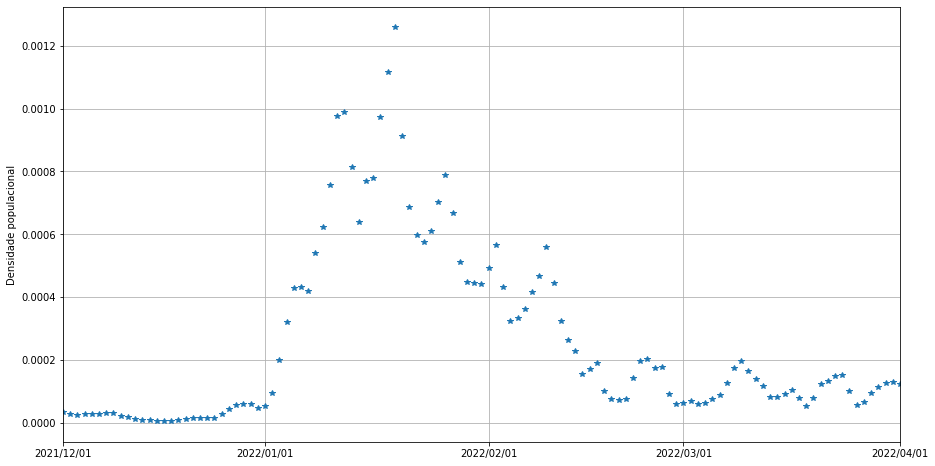

In [10]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(lista_b_mm5, lista_a_mm5,'*', label='Média móvel: intervalo de 5 termos')

ax.set_xticks(labels_lista)
ax.set_xlim(['2021/12/01','2022/04/01'])
ax.grid(True)
ax.set_ylabel('Densidade populacional')

In [11]:
# Média móvel com 7 termos

lista_a_mm7 = []
lista_b_mm7 = []

for i in range(3, niteroi.size-3):
    a = (niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2] + niteroi[i+3])/7
    b = niteroi.index[i]
    lista_a_mm7.append(a)
    lista_b_mm7.append(b)
    
população_niteroi = 515317
lista_a_mm7 = np.array(lista_a_mm7)/população_niteroi
lista_b_mm7 = np.array(lista_b_mm7)

Text(0, 0.5, 'Densidade populacional')

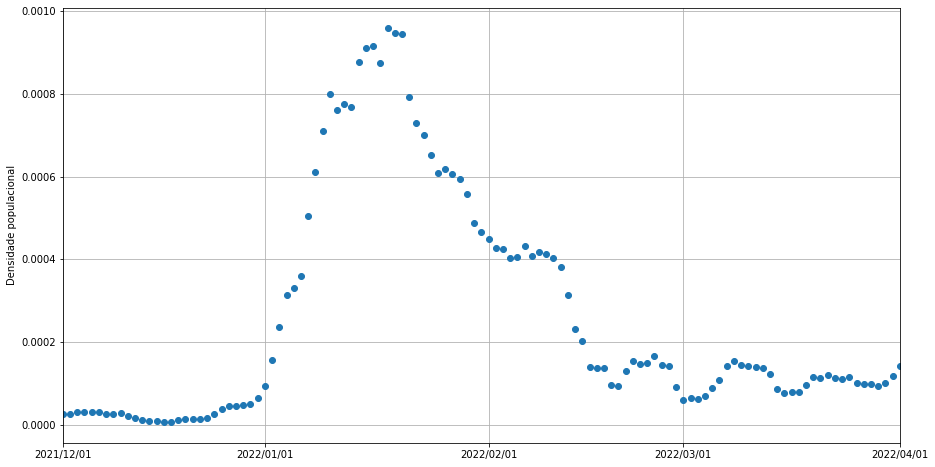

In [12]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(lista_b_mm7,lista_a_mm7, 'o',label='Média móvel: intervalo de 7 termos')

ax.set_xticks(labels_lista)
ax.set_xlim(['2021/12/01','2022/04/01'])
ax.grid(True)
ax.set_ylabel('Densidade populacional')

In [13]:
# Média móvel com 9 termos

lista_a_mm9 = []
lista_b_mm9 = []

for i in range(4, niteroi.size-4):
    a = (niteroi[i-4] + niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+4] + niteroi[i+1] + niteroi[i+2] + niteroi[i+3])/9
    b = niteroi.index[i]
    lista_a_mm9.append(a)
    lista_b_mm9.append(b)
    
população_niteroi = 515317
lista_a_mm9 = np.array(lista_a_mm9)/população_niteroi
lista_b_mm9 = np.array(lista_b_mm9)

In [14]:
# Média móvel com 11 termos

lista_a_mm11 = []
lista_b_mm11 = []

for i in range(5, niteroi.size-5):
    a = (niteroi[i-5] + niteroi[i-4] + niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+5] + niteroi[i+4] + niteroi[i+3] + niteroi[i+2] + niteroi[i+1])/11
    b = niteroi.index[i]
    lista_a_mm11.append(a)
    lista_b_mm11.append(b)
    
população_niteroi = 515317
lista_a_mm11 = np.array(lista_a_mm11)/população_niteroi
lista_b_mm11 = np.array(lista_b_mm11)

In [15]:
# Média móvel com 13 termos

lista_a_mm13 = []
lista_b_mm13 = []

for i in range(5, niteroi.size-5):
    a = (niteroi[i-6] + niteroi[i-5] + niteroi[i-4] + niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2] + niteroi[i-3] + niteroi[i-4] + niteroi[i-5] + niteroi[i-6])/13
    b = niteroi.index[i]
    lista_a_mm13.append(a)
    lista_b_mm13.append(b)
    
população_niteroi = 515317
lista_a_mm13 = np.array(lista_a_mm13)/população_niteroi
lista_b_mm13 = np.array(lista_b_mm13)

In [17]:
# Média móvel com 15 termos

lista_a_mm15 = []
lista_b_mm15 = []

for i in range(7, niteroi.size-7):
    a = (niteroi[i-7] + niteroi[i-6] + niteroi[i-5] + niteroi[i-4] + niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2] + niteroi[i-3] + niteroi[i-4] + niteroi[i-5] + niteroi[i-6] + niteroi[i+7] )/13
    b = niteroi.index[i]
    lista_a_mm15.append(a)
    lista_b_mm15.append(b)
    
população_niteroi = 515317
lista_a_mm15 = np.array(lista_a_mm15)/população_niteroi
lista_b_mm15 = np.array(lista_b_mm15)

In [18]:
dados0 = pd.read_csv('/home/isplay/Downloads/esus_sivep16509112622.csv', index_col=0)
dados0 = dados0.drop('Total')

população_niteroi = 515317

dados0_y_niteroi = dados0['Niteroi'].to_numpy()/população_niteroi
dados0_x_niteroi = dados0.index.to_numpy()

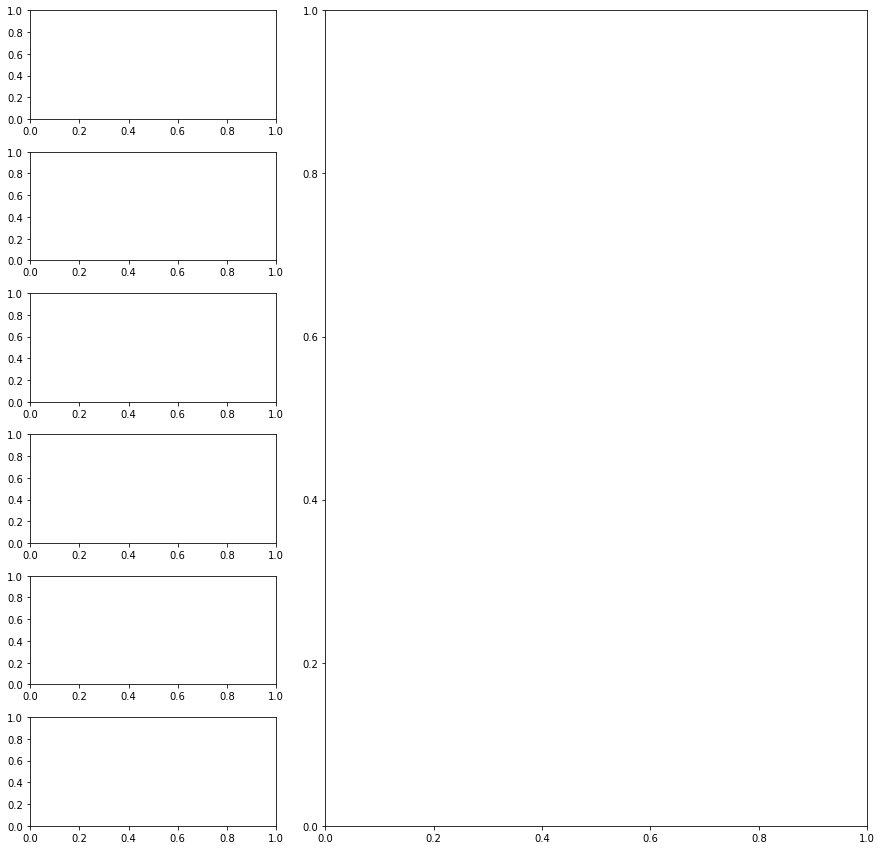

In [118]:
grid = plt.GridSpec(6, 3, hspace=0.3, wspace=0.2)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[1,0])
ax3 = fig.add_subplot(grid[2,0])
ax4 = fig.add_subplot(grid[3,0])
ax5 = fig.add_subplot(grid[4,0])
ax6 = fig.add_subplot(grid[5,0])
ax7 = fig.add_subplot(grid[0:6,1:3])



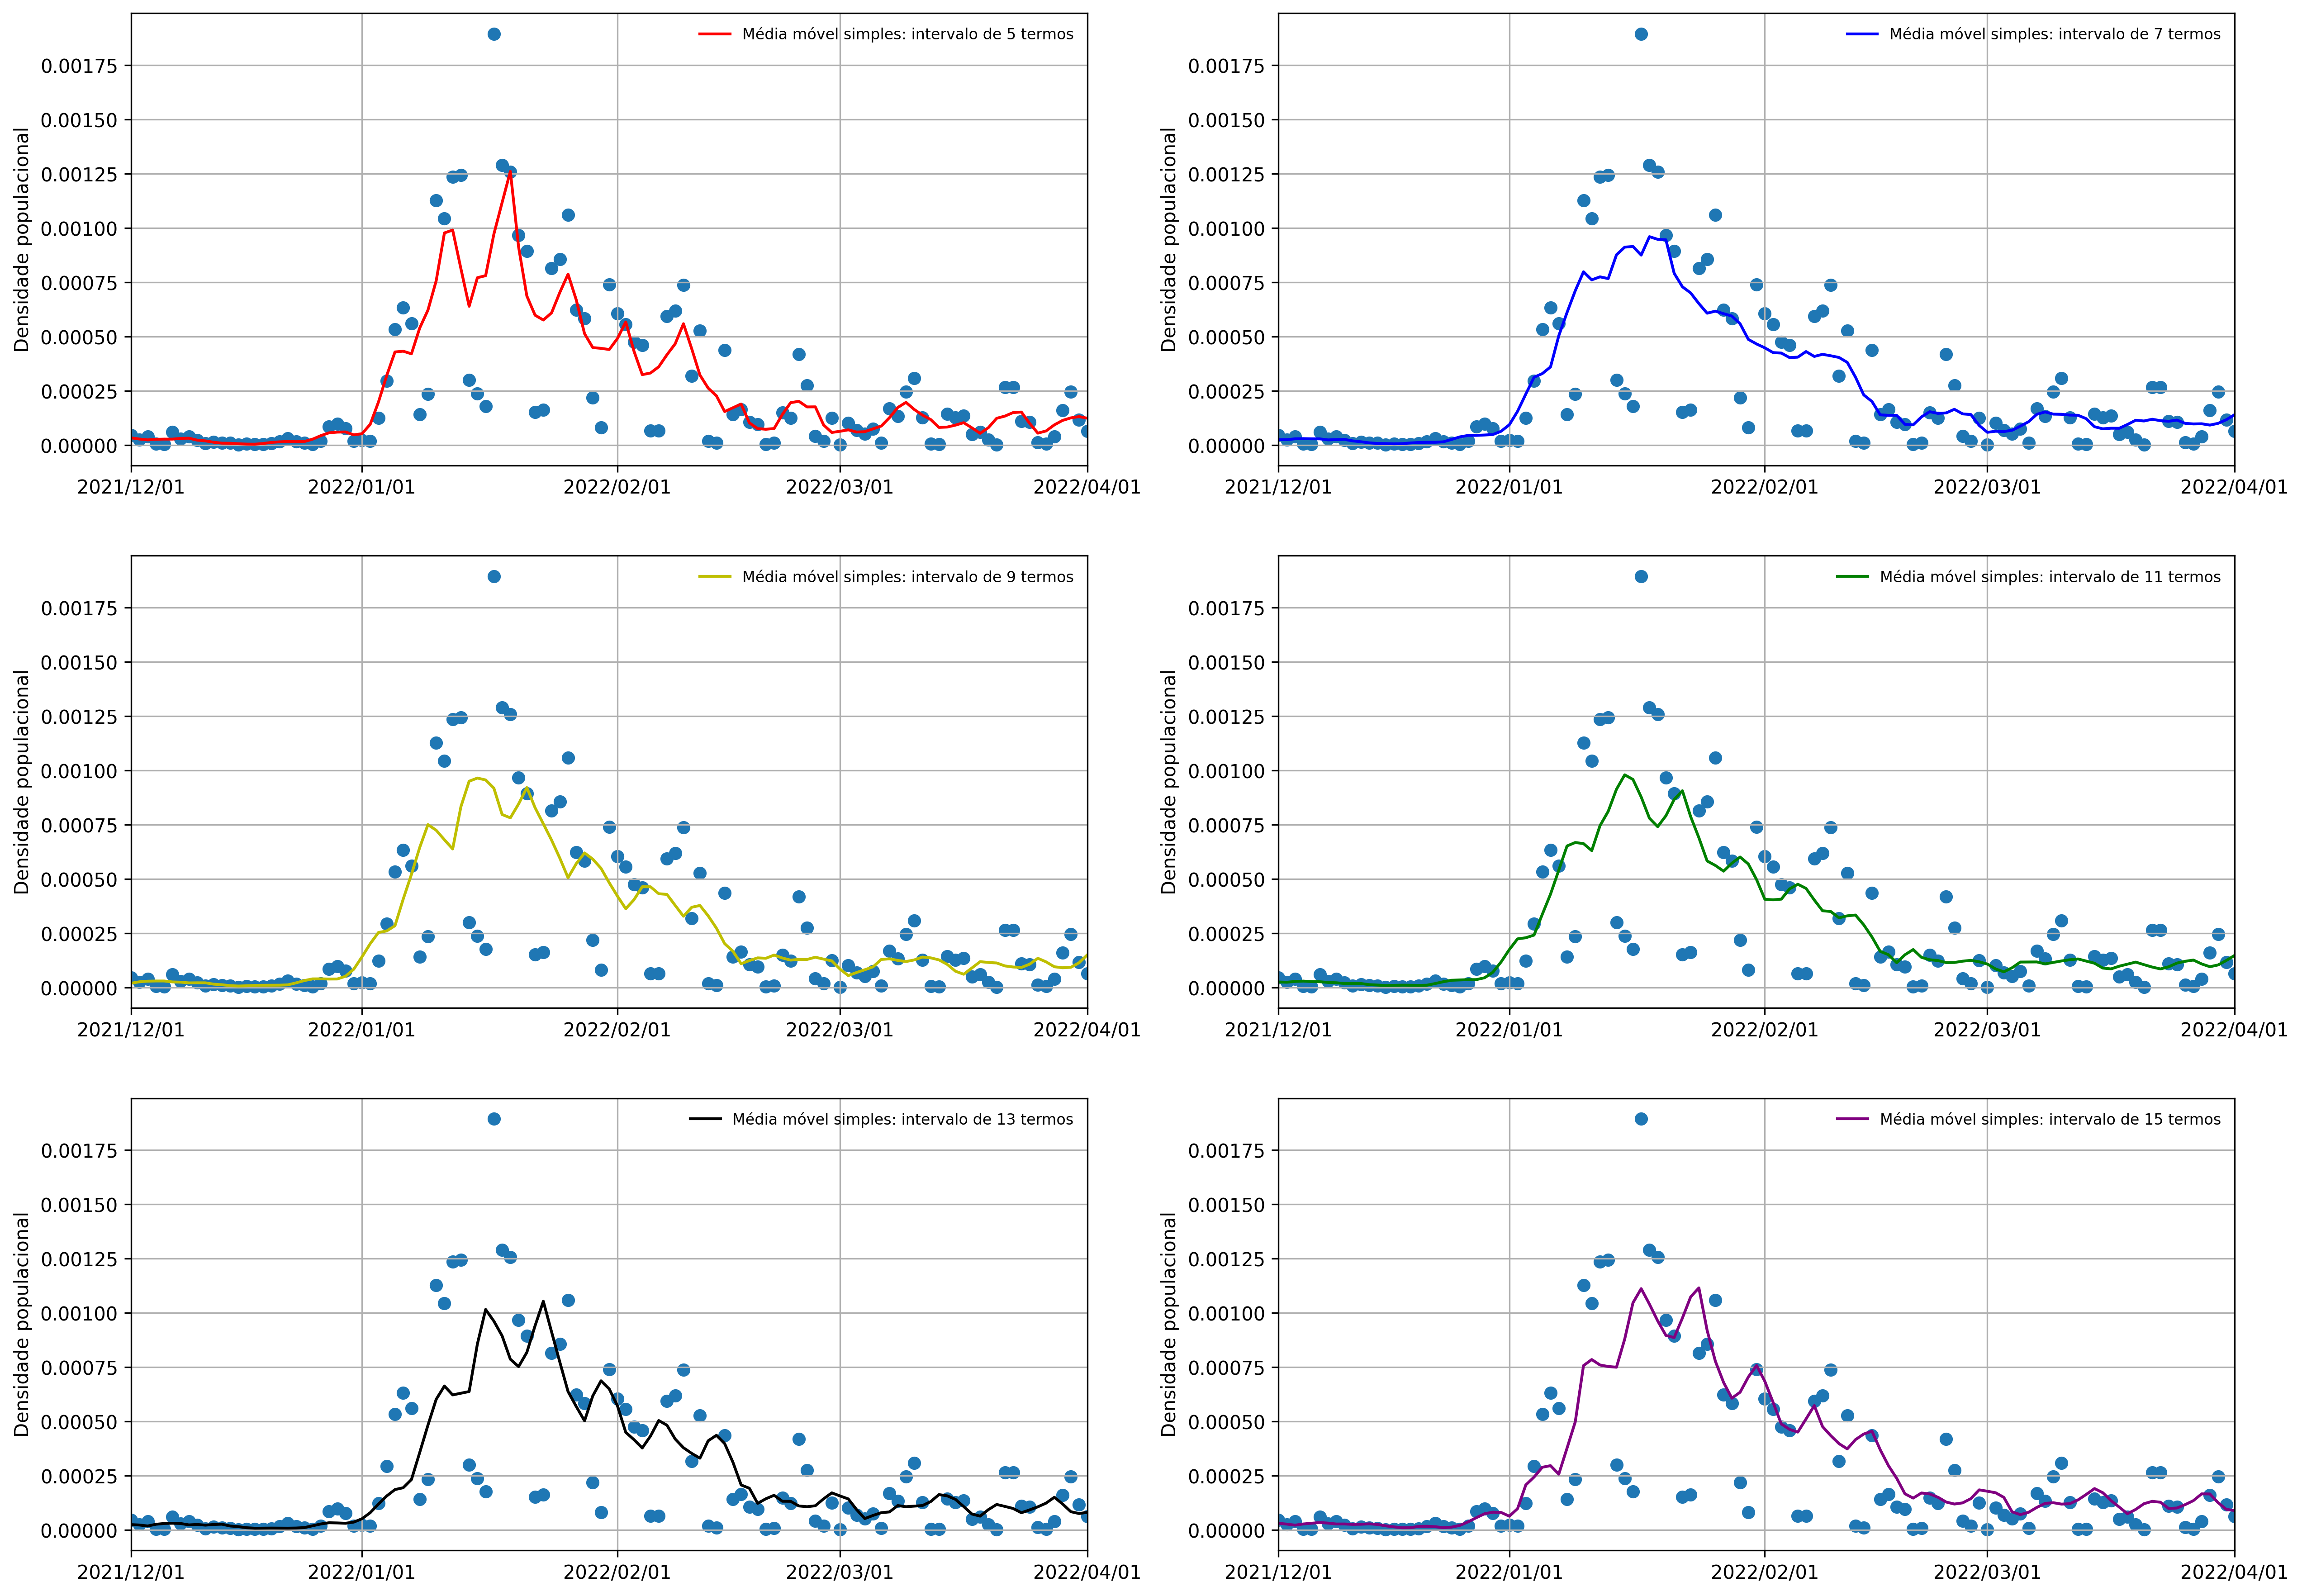

In [23]:
fig, ax = plt.subplots(figsize=(20,15), dpi=300, nrows = 3, ncols = 2)

ax[0,0].plot(lista_b_mm5, lista_a_mm5,'-r',label='Média móvel simples: intervalo de 5 termos')
ax[0,0].scatter(dados0_x_niteroi, dados0_y_niteroi)

ax[0,1].plot(lista_b_mm7,lista_a_mm7, '-b',label='Média móvel simples: intervalo de 7 termos')
ax[0,1].scatter(dados0_x_niteroi, dados0_y_niteroi)

ax[1,0].plot(lista_b_mm9,lista_a_mm9,'-y', label='Média móvel simples: intervalo de 9 termos')
ax[1,0].scatter(dados0_x_niteroi, dados0_y_niteroi)

ax[1,1].plot(lista_b_mm11, lista_a_mm11, '-g', label='Média móvel simples: intervalo de 11 termos')
ax[1,1].scatter(dados0_x_niteroi, dados0_y_niteroi)

ax[2,0].plot(lista_b_mm13, lista_a_mm13, '-k', label='Média móvel simples: intervalo de 13 termos')
ax[2,0].scatter(dados0_x_niteroi, dados0_y_niteroi)

ax[2,1].plot(lista_b_mm15, lista_a_mm15, 'purple', label='Média móvel simples: intervalo de 15 termos')
ax[2,1].scatter(dados0_x_niteroi, dados0_y_niteroi)


"""ax7.plot(lista_b_mm5, lista_a_mm5,'o-r', label='Média móvel: 5 termos')
ax7.plot(lista_b_mm7,lista_a_mm7, '--b',label='Média móvel: 7 termos')
ax7.plot(lista_b_mm9,lista_a_mm9, '1-y',label='Média móvel: 9 termos')
ax7.plot(lista_b_mm11, lista_a_mm11,'*-g', label='Média móvel: 11 termos')
ax7.plot(lista_b_mm13, lista_a_mm13, '--k',label='Média móvel: 13 termos')
ax7.plot(dados0_x_niteroi, dados0_y_niteroi,'purple',lw=1, label='Casos confirmados em Niterói')
"""

for i in range(0,3):
    for j in range(0,2):
        ax[i,j].set_xticks(labels_lista, fontsize=9, rotate=45)
        ax[i,j].set_xlim(['2021/12/01','2022/04/01'])
        ax[i,j].grid(True)
        ax[i,j].set_ylabel('Densidade populacional')
        ax[i,j].legend(frameon=False,fontsize=8)
        
plt.savefig('Médias móveis simples de casos de COVID-19 confirmados em Niterói.pdf')

In [ ]:
grid = plt.GridSpec(3, 2, hspace=0.3, wspace=0.3)
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(grid[0,0])
ax2 = fig.add_subplot(grid[0,1])
ax3 = fig.add_subplot(grid[1,0])
ax4 = fig.add_subplot(grid[1,1])
ax5 = fig.add_subplot(grid[2,0])
ax0 = fig.add_subplot(grid[2,1])
#ax7 = fig.add_subplot(grid[2:6,0:3])

ax1.plot(lista_b_mm5, lista_a_mm5,'-r',label='Média móvel simples: intervalo de 5 termos')

ax2.plot(lista_b_mm7,lista_a_mm7, '-b',label='Média móvel simples: intervalo de 7 termos')
ax3.plot(lista_b_mm9,lista_a_mm9,'-y', label='Média móvel simples: intervalo de 9 termos')
ax4.plot(lista_b_mm11, lista_a_mm11, '-g', label='Média móvel simples: intervalo de 11 termos')
ax5.plot(lista_b_mm13, lista_a_mm13, '-k', label='Média móvel simples: intervalo de 13 termos')
ax0.plot(dados0_x_niteroi, dados0_y_niteroi,'purple', label='Dados reais de Casos confirmados')

ax1.scatter(dados0_x_niteroi, dados0_y_niteroi)


"""ax7.plot(lista_b_mm5, lista_a_mm5,'o-r', label='Média móvel: 5 termos')
ax7.plot(lista_b_mm7,lista_a_mm7, '--b',label='Média móvel: 7 termos')
ax7.plot(lista_b_mm9,lista_a_mm9, '1-y',label='Média móvel: 9 termos')
ax7.plot(lista_b_mm11, lista_a_mm11,'*-g', label='Média móvel: 11 termos')
ax7.plot(lista_b_mm13, lista_a_mm13, '--k',label='Média móvel: 13 termos')
ax7.plot(dados0_x_niteroi, dados0_y_niteroi,'purple',lw=1, label='Casos confirmados em Niterói')
"""
arr = [ax1,ax2,ax3,ax4,ax5,ax0]

for i in arr:
    i.set_xticks(labels_lista, fontsize=9, rotate=45)
    i.set_xlim(['2021/12/01','2022/04/01'])
    i.grid(True)
    i.set_ylabel('Densidade populacional')
    i.legend(frameon=False,fontsize=8)
plt.title('Médias móveis simples de casos de COVID-19 confirmados em Niterói')
plt.savefig('Médias móveis simples de casos de COVID-19 confirmados em Niterói.pdf')

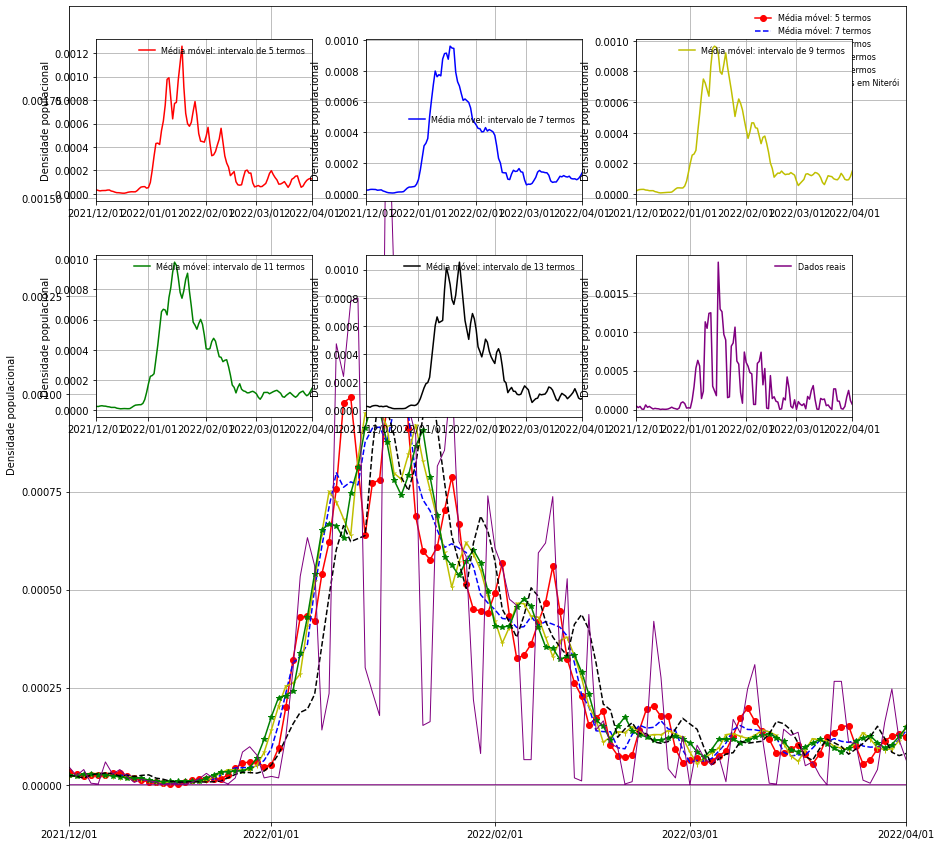

In [284]:
fig = plt.figure(figsize=(15,15))
ax7 = plt.axes()
ax1 = plt.axes([0.15,0.7,0.20,0.15])
ax2 = plt.axes([0.40,0.7,0.20,0.15])
ax3 = plt.axes([0.65,0.7,0.20,0.15])
ax4 = plt.axes([0.15,0.5,0.20,0.15])
ax5 = plt.axes([0.40,0.5,0.20,0.15])
ax6 = plt.axes([0.65,0.5,0.20,0.15])


ax1.plot(lista_b_mm5, lista_a_mm5,'-r',label='Média móvel: intervalo de 5 termos')
ax2.plot(lista_b_mm7,lista_a_mm7, '-b',label='Média móvel: intervalo de 7 termos')
ax3.plot(lista_b_mm9,lista_a_mm9,'-y', label='Média móvel: intervalo de 9 termos')
ax4.plot(lista_b_mm11, lista_a_mm11, '-g', label='Média móvel: intervalo de 11 termos')
ax5.plot(lista_b_mm13, lista_a_mm13, '-k', label='Média móvel: intervalo de 13 termos')
ax6.plot(dados0_x_niteroi, dados0_y_niteroi,'purple', label='Dados reais')


ax7.plot(lista_b_mm5, lista_a_mm5,'o-r', label='Média móvel: 5 termos')
ax7.plot(lista_b_mm7,lista_a_mm7, '--b',label='Média móvel: 7 termos')
ax7.plot(lista_b_mm9,lista_a_mm9, '1-y',label='Média móvel: 9 termos')
ax7.plot(lista_b_mm11, lista_a_mm11,'*-g', label='Média móvel: 11 termos')
ax7.plot(lista_b_mm13, lista_a_mm13, '--k',label='Média móvel: 13 termos')
ax7.plot(dados0_x_niteroi, dados0_y_niteroi,'purple',lw=1, label='Casos confirmados em Niterói')

arr = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for i in arr:
    i.set_xticks(labels_lista, fontsize=9, rotate=45)
    i.set_xlim(['2021/12/01','2022/04/01'])
    i.grid(True)
    i.set_ylabel('Densidade populacional')
    i.legend(frameon=False,fontsize=8)

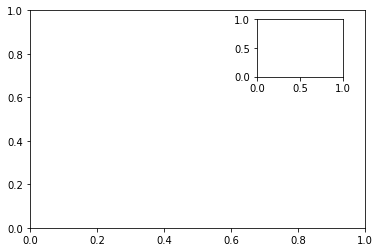

In [147]:
fig = plt.figure()
ax7 = plt.axes()
ax1 = plt.axes([0.65,0.65,0.2,0.2])
ax2 = plt.axes([0.65,0.65,0.2,0.2])
ax3 = plt.axes([0.65,0.65,0.2,0.2])
ax4 = plt.axes([0.65,0.65,0.2,0.2])
ax5 = plt.axes([0.65,0.65,0.2,0.2])
ax6 = plt.axes([0.65,0.65,0.2,0.2])



ax1.plot(lista_b_mm5, lista_a_mm5,'-r',label='Média móvel: intervalo de 5 termos')
ax2.plot(lista_b_mm7,lista_a_mm7, '-b',label='Média móvel: intervalo de 7 termos')
ax3.plot(lista_b_mm9,lista_a_mm9,'-y', label='Média móvel: intervalo de 9 termos')
ax4.plot(lista_b_mm11, lista_a_mm11, '-g', label='Média móvel: intervalo de 11 termos')
ax5.plot(lista_b_mm13, lista_a_mm13, '-k', label='Média móvel: intervalo de 13 termos')
ax6.plot(dados0_x_niteroi, dados0_y_niteroi,'purple', label='Dados reais')


ax7.plot(lista_b_mm5, lista_a_mm5,'o-r', label='Média móvel: 5 termos')
ax7.plot(lista_b_mm7,lista_a_mm7, '--b',label='Média móvel: 7 termos')
ax7.plot(lista_b_mm9,lista_a_mm9, '1-y',label='Média móvel: 9 termos')
ax7.plot(lista_b_mm11, lista_a_mm11,'*-g', label='Média móvel: 11 termos')
ax7.plot(lista_b_mm13, lista_a_mm13, '--k',label='Média móvel: 13 termos')
ax7.plot(dados0_x_niteroi, dados0_y_niteroi,'purple',lw=1, label='Casos confirmados em Niterói')

arr = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]

for i in arr:
    i.set_xticks(labels_lista, fontsize=9, rotate=45)
    i.set_xlim(['2021/12/01','2022/04/01'])
    i.grid(True)
    i.set_ylabel('Densidade populacional')
    i.legend(frameon=False,fontsize=8)

In [19]:
'2021/12/01' in lista_b

True

(624.0, 740.0)

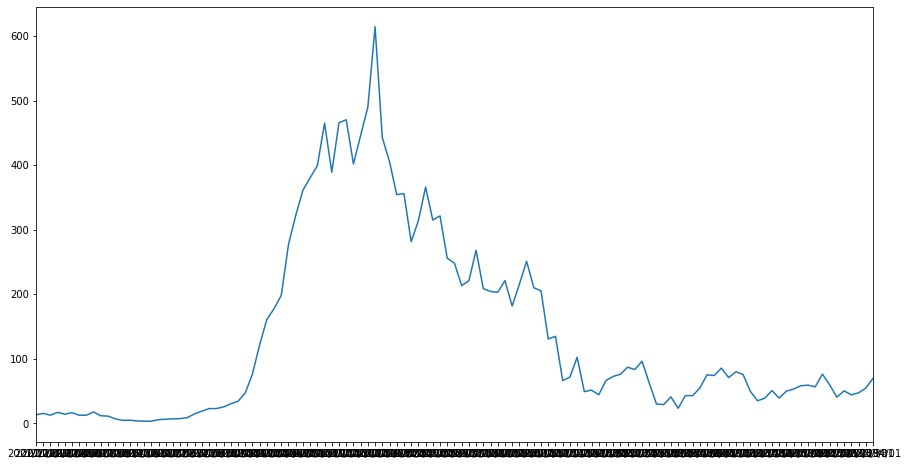

In [49]:
lista_a = []
lista_b = []

for i in range(5, niteroi.size-5):
    a = (niteroi[i-3] + niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2] + niteroi[i-3])/7
    b = niteroi.index[i]
    lista_a.append(a)
    lista_b.append(b)

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(lista_b, lista_a)
ax.set_xlim(['2021/12/01','2022/04/01'])

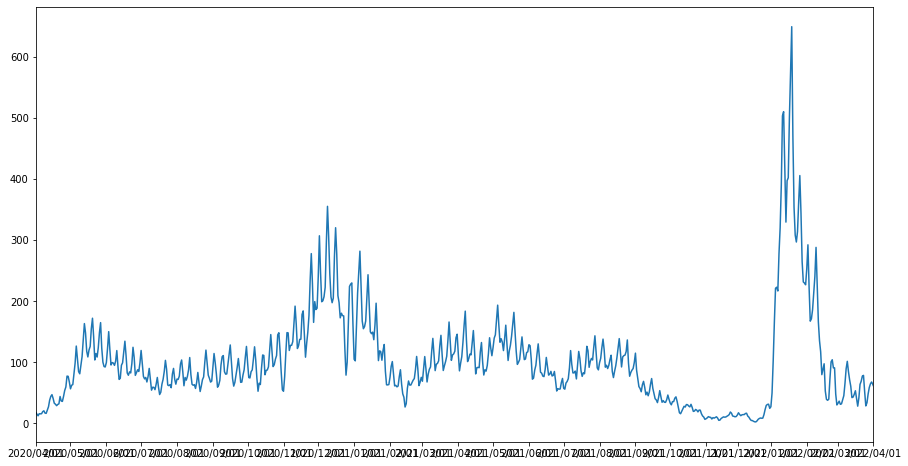

In [13]:
lista_a = []
lista_b = []

for i in range(5, niteroi.size-5):
    a = (niteroi[i-2] + niteroi[i-1] + 
         niteroi[i] + 
         niteroi[i+1] + niteroi[i+2])/5
    b = niteroi.index[i]
    lista_a.append(a)
    lista_b.append(b)
    
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(lista_b, lista_a)
ax.set_xlim(['2021/12/01','2022/04/01'])
ax.set_xticks(labels_lista)

In [227]:
x = niteroi.index.to_numpy()
y = niteroi.to_numpy()

In [226]:
x = niteroi.drop('2021/12/01').index.to_numpy()
y = niteroi.drop('2021/12/01').to_numpy()

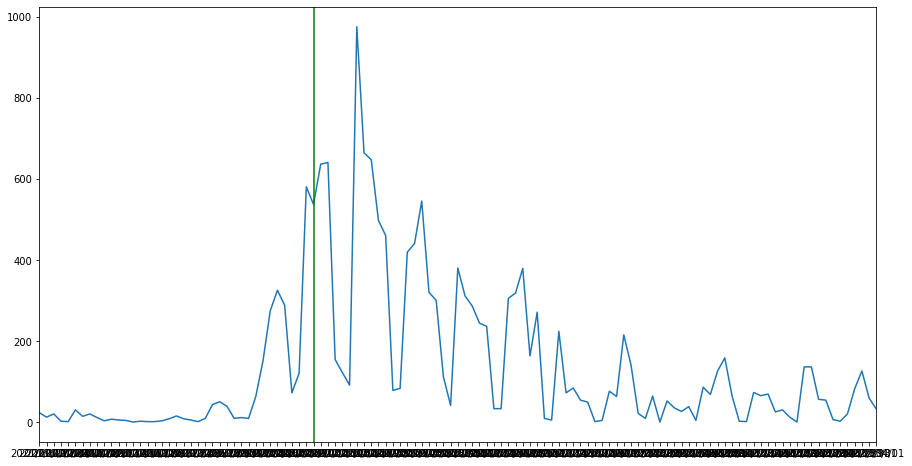

In [236]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(x, y)
ax.set_xlim(['2021/12/01','2022/04/01'])
ax.axvline(x = '2022/01/11', color = "green", label = "Index 5")

In [273]:
metrop = pd.read_csv('/home/isplay/Downloads/CasosNuevosCumulativo.csv', index_col=0)
metrop = metrop.loc['Metropolitana']
metrop

2020-03-03       0
2020-03-04       1
2020-03-05       1
2020-03-06       1
2020-03-07       1
              ... 
2022-04-23    1271
2022-04-24     811
2022-04-25     572
2022-04-26     438
2022-04-27     909
Name: Metropolitana, Length: 786, dtype: int64

In [274]:
a = metrop.index.to_numpy()

for i in range(len(metrop.index)):
    b = a[i].split('-')
    c = '/'.join(b)
    a[i] = c
a

array(['2020/03/03', '2020/03/04', '2020/03/05', '2020/03/06',
       '2020/03/07', '2020/03/08', '2020/03/09', '2020/03/10',
       '2020/03/11', '2020/03/12', '2020/03/13', '2020/03/14',
       '2020/03/15', '2020/03/16', '2020/03/17', '2020/03/18',
       '2020/03/19', '2020/03/20', '2020/03/21', '2020/03/22',
       '2020/03/23', '2020/03/24', '2020/03/25', '2020/03/26',
       '2020/03/27', '2020/03/28', '2020/03/29', '2020/03/30',
       '2020/03/31', '2020/04/01', '2020/04/02', '2020/04/03',
       '2020/04/04', '2020/04/05', '2020/04/06', '2020/04/07',
       '2020/04/08', '2020/04/09', '2020/04/10', '2020/04/11',
       '2020/04/12', '2020/04/13', '2020/04/14', '2020/04/15',
       '2020/04/16', '2020/04/17', '2020/04/18', '2020/04/19',
       '2020/04/20', '2020/04/21', '2020/04/22', '2020/04/23',
       '2020/04/24', '2020/04/25', '2020/04/26', '2020/04/27',
       '2020/04/28', '2020/04/29', '2020/04/30', '2020/05/01',
       '2020/05/02', '2020/05/03', '2020/05/04', '2020/

In [276]:
metrop.to_csv('Metropolitana.csv')